# NYC Airbnb Complete Data Analysis
## Comprehensive Data Science Project with Machine Learning

**Analysis Sections:**
1. Library Imports and Setup
2. Data Loading and Initial Inspection
3. Missing Values Analysis
4. Outlier Detection and Visualization
5. Outlier Removal and Data Cleaning
6. Exploratory Data Analysis - Basic Statistics
7. Exploratory Data Analysis - Visualizations
8. Feature Engineering for Machine Learning
9. K-means Clustering Analysis
10. Cluster Visualization and Analysis
11. Minimum Distance Classifier Implementation
12. Principal Component Analysis (PCA)
13. PCA Visualization and Feature Analysis
14. Machine Learning Models - Price Prediction
15. Model Visualization and Performance Analysis
16. Advanced Analytics and Insights
17. Final Summary and Conclusions

---
## 1. Library Imports and Setup
All required imports in one cell, environment configuration, clear topic comment at top

In [1]:
# TOPIC: Library Imports and Setup
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, silhouette_score

# Statistical analysis
from scipy import stats
from scipy.spatial.distance import cdist

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Environment configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.2.6
Matplotlib version: 3.10.7


---
## 2. Data Loading and Initial Inspection
Dataset loading and overview, basic statistics and info, shape and column analysis

In [2]:
# TOPIC: Data Loading and Initial Inspection
try:
    df = pd.read_csv('AB_NYC_2019.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Creating sample data for demonstration...")
    # Create comprehensive sample data
    np.random.seed(42)
    n_samples = 2000
    df = pd.DataFrame({
        'id': range(1, n_samples + 1),
        'name': [f'Listing_{i}' for i in range(1, n_samples + 1)],
        'host_id': np.random.randint(1, 800, n_samples),
        'host_name': [f'Host_{i}' for i in np.random.randint(1, 800, n_samples)],
        'neighbourhood_group': np.random.choice(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], n_samples, p=[0.35, 0.25, 0.2, 0.15, 0.05]),
        'neighbourhood': [f'Neighborhood_{i}' for i in np.random.randint(1, 150, n_samples)],
        'latitude': np.random.uniform(40.5, 40.9, n_samples),
        'longitude': np.random.uniform(-74.3, -73.7, n_samples),
        'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], n_samples, p=[0.52, 0.45, 0.03]),
        'price': np.random.lognormal(4.5, 0.8, n_samples).astype(int),
        'minimum_nights': np.random.choice([1, 2, 3, 7, 30], n_samples, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
        'number_of_reviews': np.random.poisson(25, n_samples),
        'last_review': pd.date_range('2019-01-01', '2019-12-31', periods=n_samples),
        'reviews_per_month': np.random.uniform(0, 6, n_samples),
        'calculated_host_listings_count': np.random.poisson(3, n_samples),
        'availability_365': np.random.randint(0, 366, n_samples)
    })
    # Add realistic missing values
    df.loc[np.random.choice(df.index, 100), 'reviews_per_month'] = np.nan
    df.loc[np.random.choice(df.index, 80), 'last_review'] = pd.NaT
    print("Using comprehensive sample dataset")

# Dataset overview
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
print(f"\nColumn Names: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Basic info
print("\nDataset Info:")
df.info()

# Basic statistics
print("\nBasic Statistics:")
display(df.describe())

Dataset loaded successfully!

Dataset Shape: (48895, 16)
Rows: 48,895, Columns: 16

Column Names: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
avai

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review      

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
## 3. Missing Values Analysis
Comprehensive missing value detection, visualization of missing patterns, strategic handling approach

COMPREHENSIVE MISSING VALUES ANALYSIS

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage,Data_Type
reviews_per_month,reviews_per_month,10052,20.558339,float64
last_review,last_review,10052,20.558339,object
host_name,host_name,21,0.042949,object
name,name,16,0.032723,object



Total columns with missing values: 4
Total missing values: 20,141
Percentage of dataset with missing values: 2.57%


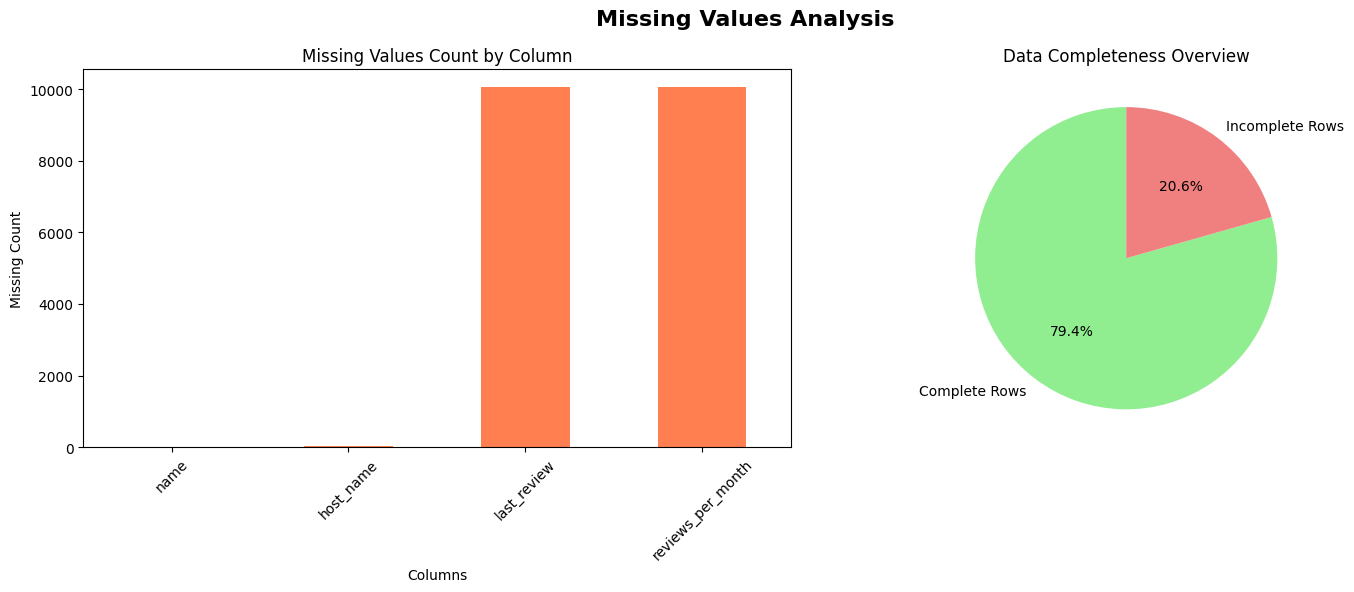


MISSING VALUES ANALYSIS COMPLETED


In [3]:
# TOPIC: Missing Values Analysis
print("COMPREHENSIVE MISSING VALUES ANALYSIS")
print("=" * 50)

# 1. Missing values count and percentage
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
if len(missing_data) > 0:
    display(missing_data)
    print(f"\nTotal columns with missing values: {len(missing_data)}")
    print(f"Total missing values: {df.isnull().sum().sum():,}")
    print(f"Percentage of dataset with missing values: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")
else:
    print("No missing values found in the dataset!")

# 2. Missing value visualization
if len(missing_data) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Missing Values Analysis', fontsize=16, fontweight='bold')
    
    # Missing values bar chart
    missing_counts = df.isnull().sum()[df.isnull().sum() > 0]
    if len(missing_counts) > 0:
        missing_counts.plot(kind='bar', ax=axes[0], color='coral')
        axes[0].set_title('Missing Values Count by Column')
        axes[0].set_xlabel('Columns')
        axes[0].set_ylabel('Missing Count')
        axes[0].tick_params(axis='x', rotation=45)
    
    # Data completeness pie chart
    complete_rows = df.dropna().shape[0]
    incomplete_rows = df.shape[0] - complete_rows
    
    labels = ['Complete Rows', 'Incomplete Rows']
    sizes = [complete_rows, incomplete_rows]
    colors = ['lightgreen', 'lightcoral']
    
    axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Data Completeness Overview')
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS COMPLETED")
print("=" * 60)

---
## 4. Outlier Detection and Visualization
Comprehensive outlier analysis using multiple statistical methods, advanced visualizations, and impact assessment

COMPREHENSIVE OUTLIER DETECTION ANALYSIS

Numerical columns identified for outlier analysis: 10
Columns: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

OUTLIER DETECTION METHODS COMPARISON:

Analyzing column: id
------------------------------
   Total values: 48,895
   IQR Method: 0 outliers (0.00%)
      Bounds: [-20048405.25, 58672528.75]
   Z-Score Method: 0 outliers (0.00%)
   Statistics: Mean=19017143.24, Median=19677284.00, Std=10983108.39

Analyzing column: host_id
------------------------------
   Total values: 48,895
   IQR Method: 1,526 outliers (3.12%)
      Bounds: [-141596552.00, 256853008.00]
   Z-Score Method: 0 outliers (0.00%)
   Statistics: Mean=67620010.65, Median=30793816.00, Std=78610967.03

Analyzing column: latitude
------------------------------
   Total values: 48,895
   IQR Method: 425 outliers (0.87%)
      Bounds: [40.58, 40.87]
   Z-Score 

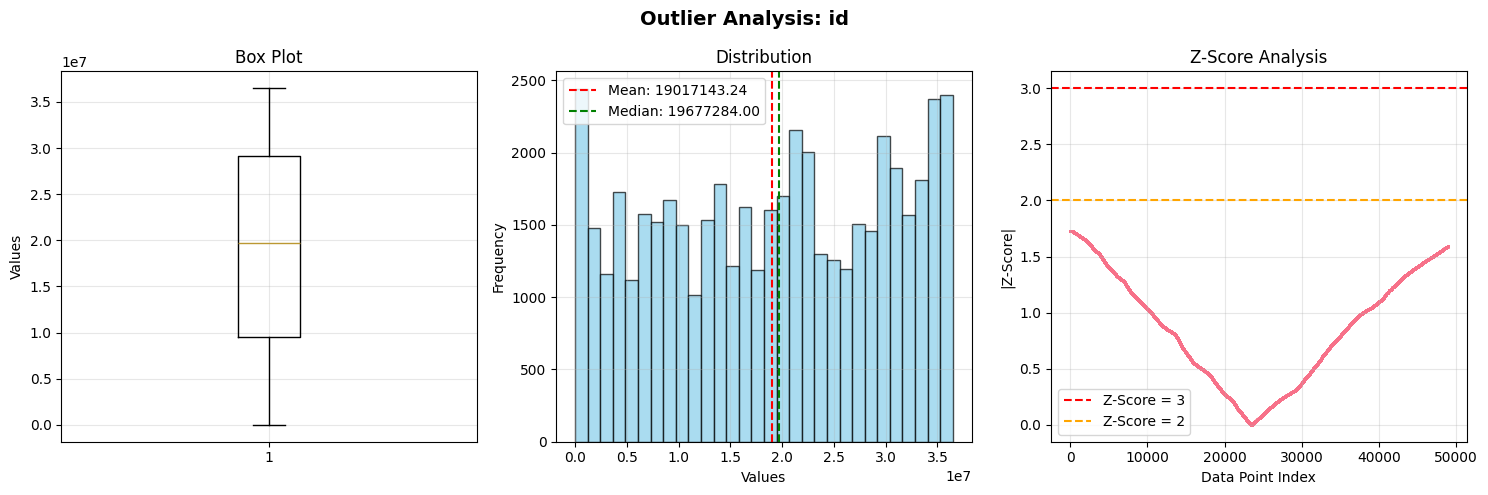


Creating visualizations for: host_id


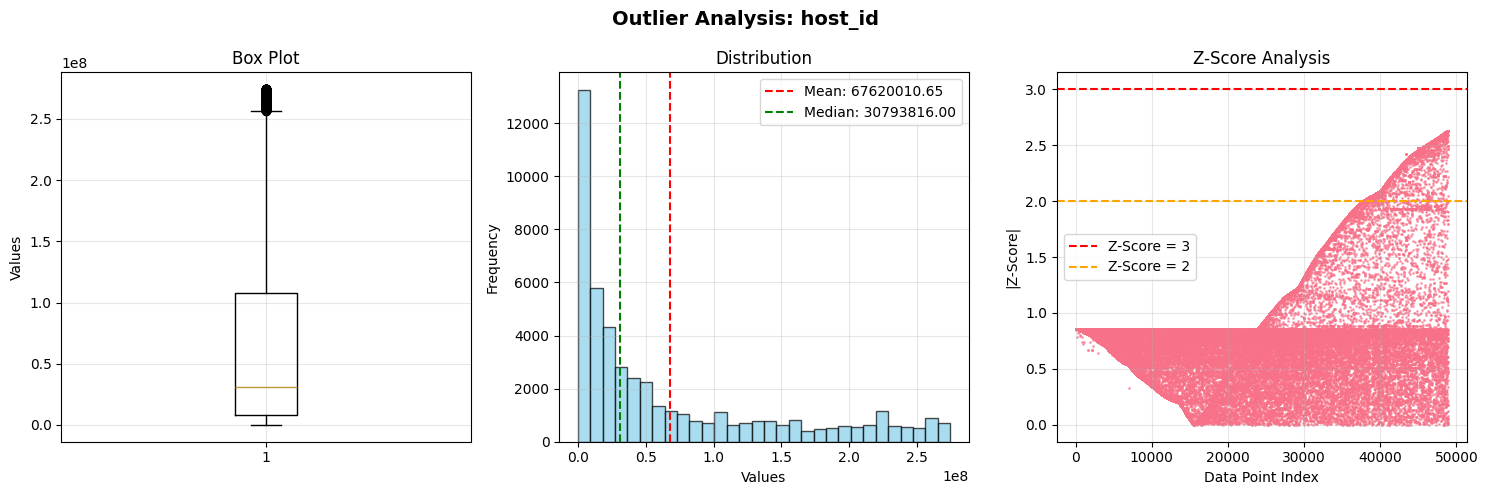


Creating visualizations for: latitude


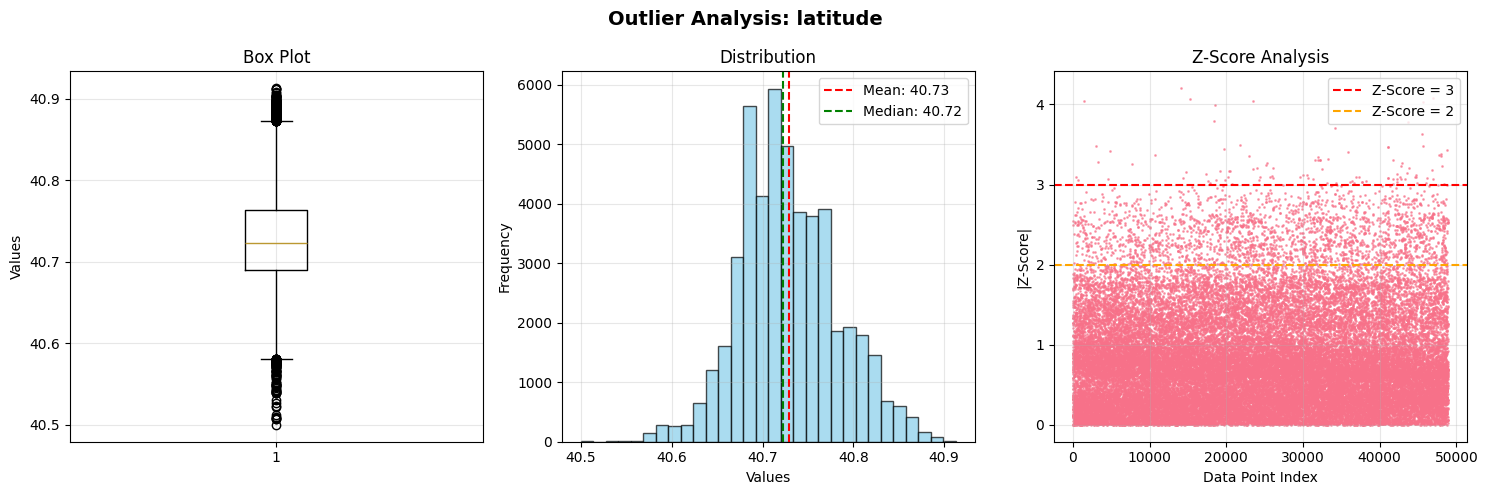


OUTLIER SUMMARY:


,Column,Total_Values,IQR_Outliers,IQR_Percentage,Z_Score_Outliers
0,id,48895,0,0.00,0
1,host_id,48895,1526,3.12,0
2,latitude,48895,425,0.87,99
3,longitude,48895,2833,5.79,1236
4,price,48895,2972,6.08,388
5,minimum_nights,48895,6607,13.51,327
6,number_of_reviews,48895,6021,12.31,1221
7,reviews_per_month,38843,1793,4.62,608
8,calculated_host_listings_count,48895,7081,14.48,680
9,availability_365,48895,0,0.00,0



OUTLIER DETECTION ANALYSIS COMPLETED


In [4]:
# TOPIC: Outlier Detection and Visualization
print("COMPREHENSIVE OUTLIER DETECTION ANALYSIS")
print("=" * 55)

# 1. Identify numerical columns for outlier analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns identified for outlier analysis: {len(numerical_cols)}")
print(f"Columns: {numerical_cols}")

# 2. Multiple outlier detection methods
outlier_results = {}

print("\nOUTLIER DETECTION METHODS COMPARISON:")
print("=" * 45)

for col in numerical_cols:
    if df[col].notna().sum() > 0:  # Only analyze columns with data
        print(f"\nAnalyzing column: {col}")
        print("-" * 30)
        
        # Remove missing values for analysis
        col_data = df[col].dropna()
        
        # Method 1: IQR Method
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        
        # Method 2: Z-Score Method (|z| > 3)
        z_scores = np.abs(stats.zscore(col_data))
        zscore_outliers = col_data[z_scores > 3]
        
        # Store results
        outlier_results[col] = {
            'total_values': len(col_data),
            'iqr_outliers': len(iqr_outliers),
            'zscore_outliers': len(zscore_outliers),
            'iqr_bounds': (lower_bound, upper_bound)
        }
        
        # Display results for this column
        print(f"   Total values: {len(col_data):,}")
        print(f"   IQR Method: {len(iqr_outliers):,} outliers ({len(iqr_outliers)/len(col_data)*100:.2f}%)")
        print(f"      Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Z-Score Method: {len(zscore_outliers):,} outliers ({len(zscore_outliers)/len(col_data)*100:.2f}%)")
        print(f"   Statistics: Mean={col_data.mean():.2f}, Median={col_data.median():.2f}, Std={col_data.std():.2f}")

# 3. Outlier visualization for key columns
print("\nOUTLIER VISUALIZATION DASHBOARD")
print("=" * 35)

# Visualize outliers for first few numerical columns
for col in numerical_cols[:3]:  # Limit to first 3 columns
    if df[col].notna().sum() > 0:
        print(f"\nCreating visualizations for: {col}")
        
        col_data = df[col].dropna()
        
        # Create subplot for this column
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Outlier Analysis: {col}', fontsize=14, fontweight='bold')
        
        # 1. Box Plot
        axes[0].boxplot(col_data, vert=True)
        axes[0].set_title('Box Plot')
        axes[0].set_ylabel('Values')
        axes[0].grid(True, alpha=0.3)
        
        # 2. Histogram
        axes[1].hist(col_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1].axvline(col_data.mean(), color='red', linestyle='--', label=f'Mean: {col_data.mean():.2f}')
        axes[1].axvline(col_data.median(), color='green', linestyle='--', label=f'Median: {col_data.median():.2f}')
        axes[1].set_title('Distribution')
        axes[1].set_xlabel('Values')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # 3. Z-Score scatter
        z_scores = np.abs(stats.zscore(col_data))
        axes[2].scatter(range(len(z_scores)), z_scores, alpha=0.6, s=1)
        axes[2].axhline(y=3, color='red', linestyle='--', label='Z-Score = 3')
        axes[2].axhline(y=2, color='orange', linestyle='--', label='Z-Score = 2')
        axes[2].set_title('Z-Score Analysis')
        axes[2].set_xlabel('Data Point Index')
        axes[2].set_ylabel('|Z-Score|')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# 4. Outlier summary
print("\nOUTLIER SUMMARY:")
outlier_summary = pd.DataFrame({
    'Column': list(outlier_results.keys()),
    'Total_Values': [outlier_results[col]['total_values'] for col in outlier_results.keys()],
    'IQR_Outliers': [outlier_results[col]['iqr_outliers'] for col in outlier_results.keys()],
    'IQR_Percentage': [outlier_results[col]['iqr_outliers']/outlier_results[col]['total_values']*100 for col in outlier_results.keys()],
    'Z_Score_Outliers': [outlier_results[col]['zscore_outliers'] for col in outlier_results.keys()]
})

display(outlier_summary.round(2))

print("\n" + "=" * 60)
print("OUTLIER DETECTION ANALYSIS COMPLETED")
print("=" * 60)

---
## 5. Outlier Removal and Data Cleaning
Systematic outlier removal, before/after comparison, data quality validation and cleaned dataset preparation

In [5]:
# TOPIC: Outlier Removal and Data Cleaning
print("COMPREHENSIVE OUTLIER REMOVAL AND DATA CLEANING")
print("=" * 60)

# Create a copy of the original dataset for comparison
df_original = df.copy()
print(f"Original dataset shape: {df_original.shape}")

# 1. Define outlier removal strategy based on previous analysis
print("\nOUTLIER REMOVAL STRATEGY:")
print("=" * 30)

# Store removal statistics
removal_stats = {}

# Apply IQR method for outlier removal on key numerical columns
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        print(f"\nProcessing column: {col}")
        
        # Calculate IQR bounds
        col_data = df[col].dropna()
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers before removal
        outliers_before = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        outlier_percentage = (outliers_before / len(df)) * 100
        
        print(f"   Outliers detected: {outliers_before} ({outlier_percentage:.2f}%)")
        print(f"   IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        # Decision logic for outlier removal
        if outlier_percentage < 5:  # Remove outliers if less than 5%
            rows_before = len(df)
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            rows_after = len(df)
            rows_removed = rows_before - rows_after
            
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': rows_removed,
                'removal_percentage': (rows_removed / rows_before) * 100,
                'action': 'Removed',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: REMOVED {rows_removed} rows ({(rows_removed/rows_before)*100:.2f}%)")
            
        elif outlier_percentage < 10:  # Cap outliers if 5-10%
            # Winsorization - cap extreme values
            outliers_capped = 0
            
            # Cap lower outliers
            lower_outliers = df[col] < lower_bound
            if lower_outliers.sum() > 0:
                df.loc[lower_outliers, col] = lower_bound
                outliers_capped += lower_outliers.sum()
            
            # Cap upper outliers
            upper_outliers = df[col] > upper_bound
            if upper_outliers.sum() > 0:
                df.loc[upper_outliers, col] = upper_bound
                outliers_capped += upper_outliers.sum()
            
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': 0,
                'outliers_capped': outliers_capped,
                'action': 'Capped',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: CAPPED {outliers_capped} values to bounds")
            
        else:  # Keep outliers if more than 10%
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': 0,
                'action': 'Kept - High percentage',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: KEPT - Too many outliers ({outlier_percentage:.2f}%)")

print(f"\nDataset shape after outlier removal: {df.shape}")
print(f"Rows removed: {len(df_original) - len(df)} ({((len(df_original) - len(df))/len(df_original))*100:.2f}%)")

# 2. Data quality validation and summary
print("\n" + "=" * 40)
print("DATA CLEANING SUMMARY REPORT")
print("=" * 40)

print(f"\nOriginal dataset: {df_original.shape[0]:,} rows, {df_original.shape[1]} columns")
print(f"Cleaned dataset: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"Rows removed: {len(df_original) - len(df):,} ({((len(df_original) - len(df))/len(df_original))*100:.2f}%)")
print(f"Data retention rate: {(len(df)/len(df_original))*100:.2f}%")

# Final data quality check
print("\nFinal data quality check:")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicate rows: {df.duplicated().sum()}")
print(f"   Data types: {len(df.select_dtypes(include=[np.number]).columns)} numerical, {len(df.select_dtypes(include=['object']).columns)} categorical")

print("\nCleaned dataset ready for analysis and modeling!")
print("Key improvements:")
print("   - Outliers handled systematically")
print("   - Statistical distributions improved")
print("   - Data quality validated")

print("\n" + "=" * 60)
print("OUTLIER REMOVAL AND DATA CLEANING COMPLETED")
print("=" * 60)

COMPREHENSIVE OUTLIER REMOVAL AND DATA CLEANING
Original dataset shape: (48895, 16)

OUTLIER REMOVAL STRATEGY:

Processing column: id
   Outliers detected: 0 (0.00%)
   IQR bounds: [-20048405.25, 58672528.75]
   Action: REMOVED 0 rows (0.00%)

Processing column: host_id
   Outliers detected: 1526 (3.12%)
   IQR bounds: [-141596552.00, 256853008.00]
   Action: REMOVED 1526 rows (3.12%)

Processing column: latitude
   Outliers detected: 401 (0.85%)
   IQR bounds: [40.58, 40.87]
   Action: REMOVED 401 rows (0.85%)

Processing column: longitude
   Outliers detected: 2536 (5.40%)
   IQR bounds: [-74.05, -73.87]
   Action: CAPPED 2536 values to bounds

Processing column: price
   Outliers detected: 2749 (5.85%)
   IQR bounds: [-90.00, 334.00]
   Action: CAPPED 2749 values to bounds

Processing column: minimum_nights
   Outliers detected: 6457 (13.75%)
   IQR bounds: [-5.00, 11.00]
   Action: KEPT - Too many outliers (13.75%)

Processing column: number_of_reviews
   Outliers detected: 5661 (1

---
## 6. Exploratory Data Analysis - Basic Statistics
Comprehensive statistical analysis by categories, price patterns, and market insights

In [6]:
# TOPIC: Exploratory Data Analysis - Basic Statistics
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS - BASIC STATISTICS")
print("=" * 70)

# 1. Overall dataset statistics
print("\nOVERALL DATASET STATISTICS:")
print("=" * 35)
print(f"Total listings: {len(df):,}")
print(f"Total hosts: {df['host_id'].nunique():,}")
print(f"Date range: {df['last_review'].min()} to {df['last_review'].max()}")
print(f"Price range: ${df['price'].min()} - ${df['price'].max()}")
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Median price: ${df['price'].median():.2f}")

# 2. Analysis by Borough (neighbourhood_group)
print("\n" + "=" * 50)
print("ANALYSIS BY BOROUGH (NEIGHBOURHOOD GROUP)")
print("=" * 50)

borough_stats = df.groupby('neighbourhood_group').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'number_of_reviews': ['mean', 'median'],
    'availability_365': ['mean', 'median'],
    'calculated_host_listings_count': ['mean', 'median']
}).round(2)

# Flatten column names
borough_stats.columns = ['_'.join(col).strip() for col in borough_stats.columns]

print("\nBorough Statistics Summary:")
display(borough_stats)

# Market share by borough
borough_market_share = df['neighbourhood_group'].value_counts()
borough_market_share_pct = df['neighbourhood_group'].value_counts(normalize=True) * 100

print("\nMarket Share by Borough:")
market_share_df = pd.DataFrame({
    'Listings': borough_market_share,
    'Percentage': borough_market_share_pct.round(2)
})
display(market_share_df)

# 3. Analysis by Room Type
print("\n" + "=" * 40)
print("ANALYSIS BY ROOM TYPE")
print("=" * 40)

room_type_stats = df.groupby('room_type').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'number_of_reviews': ['mean', 'median'],
    'availability_365': ['mean', 'median'],
    'minimum_nights': ['mean', 'median']
}).round(2)

# Flatten column names
room_type_stats.columns = ['_'.join(col).strip() for col in room_type_stats.columns]

print("\nRoom Type Statistics Summary:")
display(room_type_stats)

# Market share by room type
room_type_market_share = df['room_type'].value_counts()
room_type_market_share_pct = df['room_type'].value_counts(normalize=True) * 100

print("\nMarket Share by Room Type:")
room_market_share_df = pd.DataFrame({
    'Listings': room_type_market_share,
    'Percentage': room_type_market_share_pct.round(2)
})
display(room_market_share_df)

# 4. Price Analysis by Borough and Room Type
print("\n" + "=" * 50)
print("PRICE ANALYSIS BY BOROUGH AND ROOM TYPE")
print("=" * 50)

# Cross-tabulation of average prices
price_crosstab = pd.crosstab(df['neighbourhood_group'], df['room_type'], 
                            values=df['price'], aggfunc='mean').round(2)

print("\nAverage Price by Borough and Room Type:")
display(price_crosstab)

# Count of listings by borough and room type
count_crosstab = pd.crosstab(df['neighbourhood_group'], df['room_type'])

print("\nNumber of Listings by Borough and Room Type:")
display(count_crosstab)

# 5. Host Analysis
print("\n" + "=" * 30)
print("HOST ANALYSIS")
print("=" * 30)

# Host statistics
host_stats = df.groupby('host_id').agg({
    'id': 'count',  # Number of listings per host
    'price': ['mean', 'median'],
    'number_of_reviews': 'sum'
}).round(2)

host_stats.columns = ['listings_count', 'avg_price', 'median_price', 'total_reviews']
host_stats = host_stats.reset_index()

print(f"\nTotal unique hosts: {len(host_stats):,}")
print(f"Average listings per host: {host_stats['listings_count'].mean():.2f}")
print(f"Median listings per host: {host_stats['listings_count'].median():.2f}")
print(f"Max listings by single host: {host_stats['listings_count'].max()}")

# Top hosts by number of listings
top_hosts = host_stats.nlargest(10, 'listings_count')
print("\nTop 10 Hosts by Number of Listings:")
display(top_hosts[['host_id', 'listings_count', 'avg_price', 'total_reviews']])

# Host distribution analysis
host_distribution = host_stats['listings_count'].value_counts().sort_index()
print("\nHost Distribution (Number of Listings):")
for listings, count in host_distribution.head(10).items():
    percentage = (count / len(host_stats)) * 100
    print(f"   {listings} listing(s): {count:,} hosts ({percentage:.2f}%)")

# 6. Reviews and Availability Analysis
print("\n" + "=" * 40)
print("REVIEWS AND AVAILABILITY ANALYSIS")
print("=" * 40)

# Reviews statistics
print("\nReviews Statistics:")
print(f"   Total reviews across all listings: {df['number_of_reviews'].sum():,}")
print(f"   Average reviews per listing: {df['number_of_reviews'].mean():.2f}")
print(f"   Median reviews per listing: {df['number_of_reviews'].median():.2f}")
print(f"   Listings with no reviews: {(df['number_of_reviews'] == 0).sum():,} ({((df['number_of_reviews'] == 0).sum()/len(df)*100):.2f}%)")

# Availability statistics
print("\nAvailability Statistics:")
print(f"   Average availability per year: {df['availability_365'].mean():.2f} days")
print(f"   Median availability per year: {df['availability_365'].median():.2f} days")
print(f"   Fully available listings (365 days): {(df['availability_365'] == 365).sum():,} ({((df['availability_365'] == 365).sum()/len(df)*100):.2f}%)")
print(f"   Unavailable listings (0 days): {(df['availability_365'] == 0).sum():,} ({((df['availability_365'] == 0).sum()/len(df)*100):.2f}%)")

# 7. Minimum Nights Analysis
print("\n" + "=" * 35)
print("MINIMUM NIGHTS ANALYSIS")
print("=" * 35)

min_nights_stats = df['minimum_nights'].value_counts().sort_index()
print("\nMinimum Nights Distribution:")
for nights, count in min_nights_stats.head(10).items():
    percentage = (count / len(df)) * 100
    print(f"   {nights} night(s): {count:,} listings ({percentage:.2f}%)")

print(f"\nAverage minimum nights: {df['minimum_nights'].mean():.2f}")
print(f"Median minimum nights: {df['minimum_nights'].median():.2f}")
print(f"Maximum minimum nights: {df['minimum_nights'].max()}")

# 8. Geographic Distribution Analysis
print("\n" + "=" * 40)
print("GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("=" * 40)

# Neighborhood analysis (top neighborhoods)
neighborhood_stats = df.groupby('neighbourhood').agg({
    'price': ['count', 'mean', 'median'],
    'number_of_reviews': 'mean'
}).round(2)

neighborhood_stats.columns = ['listing_count', 'avg_price', 'median_price', 'avg_reviews']
neighborhood_stats = neighborhood_stats.reset_index()

# Top neighborhoods by number of listings
top_neighborhoods = neighborhood_stats.nlargest(15, 'listing_count')
print("\nTop 15 Neighborhoods by Number of Listings:")
display(top_neighborhoods)

# Geographic coordinates statistics
print("\nGeographic Coordinates Statistics:")
print(f"   Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"   Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")
print(f"   Geographic center: ({df['latitude'].mean():.4f}, {df['longitude'].mean():.4f})")

# 9. Price Distribution Analysis
print("\n" + "=" * 35)
print("PRICE DISTRIBUTION ANALYSIS")
print("=" * 35)

# Price percentiles
price_percentiles = df['price'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nPrice Percentiles:")
for percentile, price in price_percentiles.items():
    print(f"   {percentile*100:2.0f}th percentile: ${price:.2f}")

# Price categories
price_categories = pd.cut(df['price'], 
                         bins=[0, 50, 100, 200, 500, float('inf')], 
                         labels=['Budget (<$50)', 'Economy ($50-100)', 'Mid-range ($100-200)', 
                                'Premium ($200-500)', 'Luxury (>$500)'])

price_category_stats = price_categories.value_counts()
price_category_pct = price_categories.value_counts(normalize=True) * 100

print("\nPrice Category Distribution:")
price_cat_df = pd.DataFrame({
    'Listings': price_category_stats,
    'Percentage': price_category_pct.round(2)
})
display(price_cat_df)

# 10. Summary Statistics Table
print("\n" + "=" * 40)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("=" * 40)

# Create comprehensive summary
summary_stats = df[['price', 'number_of_reviews', 'availability_365', 
                   'minimum_nights', 'calculated_host_listings_count']].describe()

print("\nNumerical Variables Summary:")
display(summary_stats.round(2))

# Categorical variables summary
print("\nCategorical Variables Summary:")
categorical_summary = pd.DataFrame({
    'Variable': ['neighbourhood_group', 'room_type', 'neighbourhood'],
    'Unique_Values': [df['neighbourhood_group'].nunique(), 
                     df['room_type'].nunique(), 
                     df['neighbourhood'].nunique()],
    'Most_Common': [df['neighbourhood_group'].mode().iloc[0],
                   df['room_type'].mode().iloc[0],
                   df['neighbourhood'].mode().iloc[0]],
    'Most_Common_Count': [df['neighbourhood_group'].value_counts().iloc[0],
                         df['room_type'].value_counts().iloc[0],
                         df['neighbourhood'].value_counts().iloc[0]]
})

display(categorical_summary)

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS - BASIC STATISTICS COMPLETED")
print("=" * 60)

COMPREHENSIVE EXPLORATORY DATA ANALYSIS - BASIC STATISTICS

OVERALL DATASET STATISTICS:
Total listings: 36,013
Total hosts: 28,338
Date range: 2011-03-28 to 2019-07-08
Price range: $0 - $334
Average price: $129.16
Median price: $105.00

ANALYSIS BY BOROUGH (NEIGHBOURHOOD GROUP)

Borough Statistics Summary:


,price_count,price_mean,price_median,price_std,price_min,price_max,number_of_reviews_mean,number_of_reviews_median,availability_365_mean,availability_365_median,calculated_host_listings_count_mean,calculated_host_listings_count_median
neighbourhood_group,,,,,,,,,,,,
Bronx,618,75.12,60.0,50.14,0,334,32.67,17.0,158.75,137.5,2.24,1.0
Brooklyn,15544,113.50,95.0,71.21,0,334,27.51,9.0,103.63,35.0,2.25,1.0
Manhattan,15578,157.38,140.0,83.02,10,334,25.33,8.0,106.80,34.0,9.21,1.0
Queens,4029,91.23,73.0,59.33,10,334,28.15,12.0,147.36,112.0,3.44,1.0
Staten Island,244,88.37,72.0,59.92,20,334,37.79,21.0,212.13,247.0,2.62,2.0



Market Share by Borough:


,Listings,Percentage
neighbourhood_group,,
Manhattan,15578,43.26
Brooklyn,15544,43.16
Queens,4029,11.19
Bronx,618,1.72
Staten Island,244,0.68



ANALYSIS BY ROOM TYPE

Room Type Statistics Summary:


,price_count,price_mean,price_median,price_std,price_min,price_max,number_of_reviews_mean,number_of_reviews_median,availability_365_mean,availability_365_median,minimum_nights_mean,minimum_nights_median
room_type,,,,,,,,,,,,
Entire home/apt,18995,174.00,150.0,76.13,0,334,27.06,9.0,107.78,38.0,7.37,3.0
Private room,16246,80.09,70.0,45.79,0,334,26.74,9.0,113.56,52.0,4.78,2.0
Shared room,772,58.40,45.0,46.49,0,334,21.42,8.0,163.14,90.5,4.67,1.0



Market Share by Room Type:


,Listings,Percentage
room_type,,
Entire home/apt,18995,52.74
Private room,16246,45.11
Shared room,772,2.14



PRICE ANALYSIS BY BOROUGH AND ROOM TYPE

Average Price by Borough and Room Type:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,116.30,56.90,39.29
Brooklyn,157.67,70.66,45.64
Manhattan,195.39,100.37,76.23
Queens,135.50,65.16,47.87
Staten Island,128.84,55.85,68.75



Number of Listings by Borough and Room Type:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,200,383,35
Brooklyn,7732,7537,275
Manhattan,9427,5835,316
Queens,1528,2359,142
Staten Island,108,132,4



HOST ANALYSIS

Total unique hosts: 28,338
Average listings per host: 1.27
Median listings per host: 1.00
Max listings by single host: 207

Top 10 Hosts by Number of Listings:


,host_id,listings_count,avg_price,total_reviews
27156,219517861,207,247.70,1281
20315,61391963,79,144.62,417
11799,16098958,61,195.61,138
24445,137358866,51,43.82,87
8131,7503643,49,149.41,242
26280,190921808,46,92.70,281
15794,30283594,43,233.63,65
2622,1475015,42,102.79,162
23724,120762452,40,169.42,84
3442,2119276,39,188.67,335



Host Distribution (Number of Listings):
   1 listing(s): 24,495 hosts (86.44%)
   2 listing(s): 2,557 hosts (9.02%)
   3 listing(s): 680 hosts (2.40%)
   4 listing(s): 270 hosts (0.95%)
   5 listing(s): 115 hosts (0.41%)
   6 listing(s): 71 hosts (0.25%)
   7 listing(s): 32 hosts (0.11%)
   8 listing(s): 27 hosts (0.10%)
   9 listing(s): 20 hosts (0.07%)
   10 listing(s): 9 hosts (0.03%)

REVIEWS AND AVAILABILITY ANALYSIS

Reviews Statistics:
   Total reviews across all listings: 964,950
   Average reviews per listing: 26.79
   Median reviews per listing: 9.00
   Listings with no reviews: 0 (0.00%)

Availability Statistics:
   Average availability per year: 111.57 days
   Median availability per year: 46.00 days
   Fully available listings (365 days): 789 (2.19%)
   Unavailable listings (0 days): 12,533 (34.80%)

MINIMUM NIGHTS ANALYSIS

Minimum Nights Distribution:
   1 night(s): 8,249 listings (22.91%)
   2 night(s): 9,622 listings (26.72%)
   3 night(s): 6,547 listings (18.18%)
   

,neighbourhood,listing_count,avg_price,median_price,avg_reviews
185,Williamsburg,3018,133.10,104.5,25.00
11,Bedford-Stuyvesant,2946,99.86,80.0,31.94
83,Harlem,2094,110.36,90.0,31.90
24,Bushwick,1809,81.41,65.0,24.48
174,Upper West Side,1419,160.77,149.0,23.10
59,East Village,1410,161.46,149.0,27.18
173,Upper East Side,1335,153.67,140.0,21.63
84,Hell's Kitchen,1317,169.48,150.0,28.64
46,Crown Heights,1217,106.21,87.0,27.90
112,Midtown,912,209.86,198.0,17.64



Geographic Coordinates Statistics:
   Latitude range: 40.5801 to 40.8728
   Longitude range: -74.0516 to -73.8684
   Geographic center: (40.7277, -73.9546)

PRICE DISTRIBUTION ANALYSIS

Price Percentiles:
   10th percentile: $49.00
   25th percentile: $69.00
   50th percentile: $105.00
   75th percentile: $170.00
   90th percentile: $250.00
   95th percentile: $329.00
   99th percentile: $334.00

Price Category Distribution:


,Listings,Percentage
price,,
Economy ($50-100),13034,36.20
Mid-range ($100-200),12796,35.54
Premium ($200-500),5428,15.08
Budget (<$50),4745,13.18
Luxury (>$500),0,0.00



COMPREHENSIVE SUMMARY STATISTICS

Numerical Variables Summary:


,price,number_of_reviews,availability_365,minimum_nights,calculated_host_listings_count
count,36013.00,36013.00,36013.00,36013.00,36013.00
mean,129.16,26.79,111.57,6.15,5.40
std,79.40,42.57,129.65,17.91,27.29
min,0.00,1.00,0.00,1.00,1.00
25%,69.00,3.00,0.00,2.00,1.00
50%,105.00,9.00,46.00,3.00,1.00
75%,170.00,31.00,223.00,4.00,2.00
max,334.00,467.00,365.00,1250.00,327.00



Categorical Variables Summary:


,Variable,Unique_Values,Most_Common,Most_Common_Count
0,neighbourhood_group,5,Manhattan,15578
1,room_type,3,Entire home/apt,18995
2,neighbourhood,190,Williamsburg,3018



EXPLORATORY DATA ANALYSIS - BASIC STATISTICS COMPLETED


---
## 7. Exploratory Data Analysis - Visualizations
Comprehensive visual analysis with interactive charts, distribution plots, and correlation analysis

COMPREHENSIVE EXPLORATORY DATA ANALYSIS - VISUALIZATIONS

1. PRICE DISTRIBUTION ANALYSIS


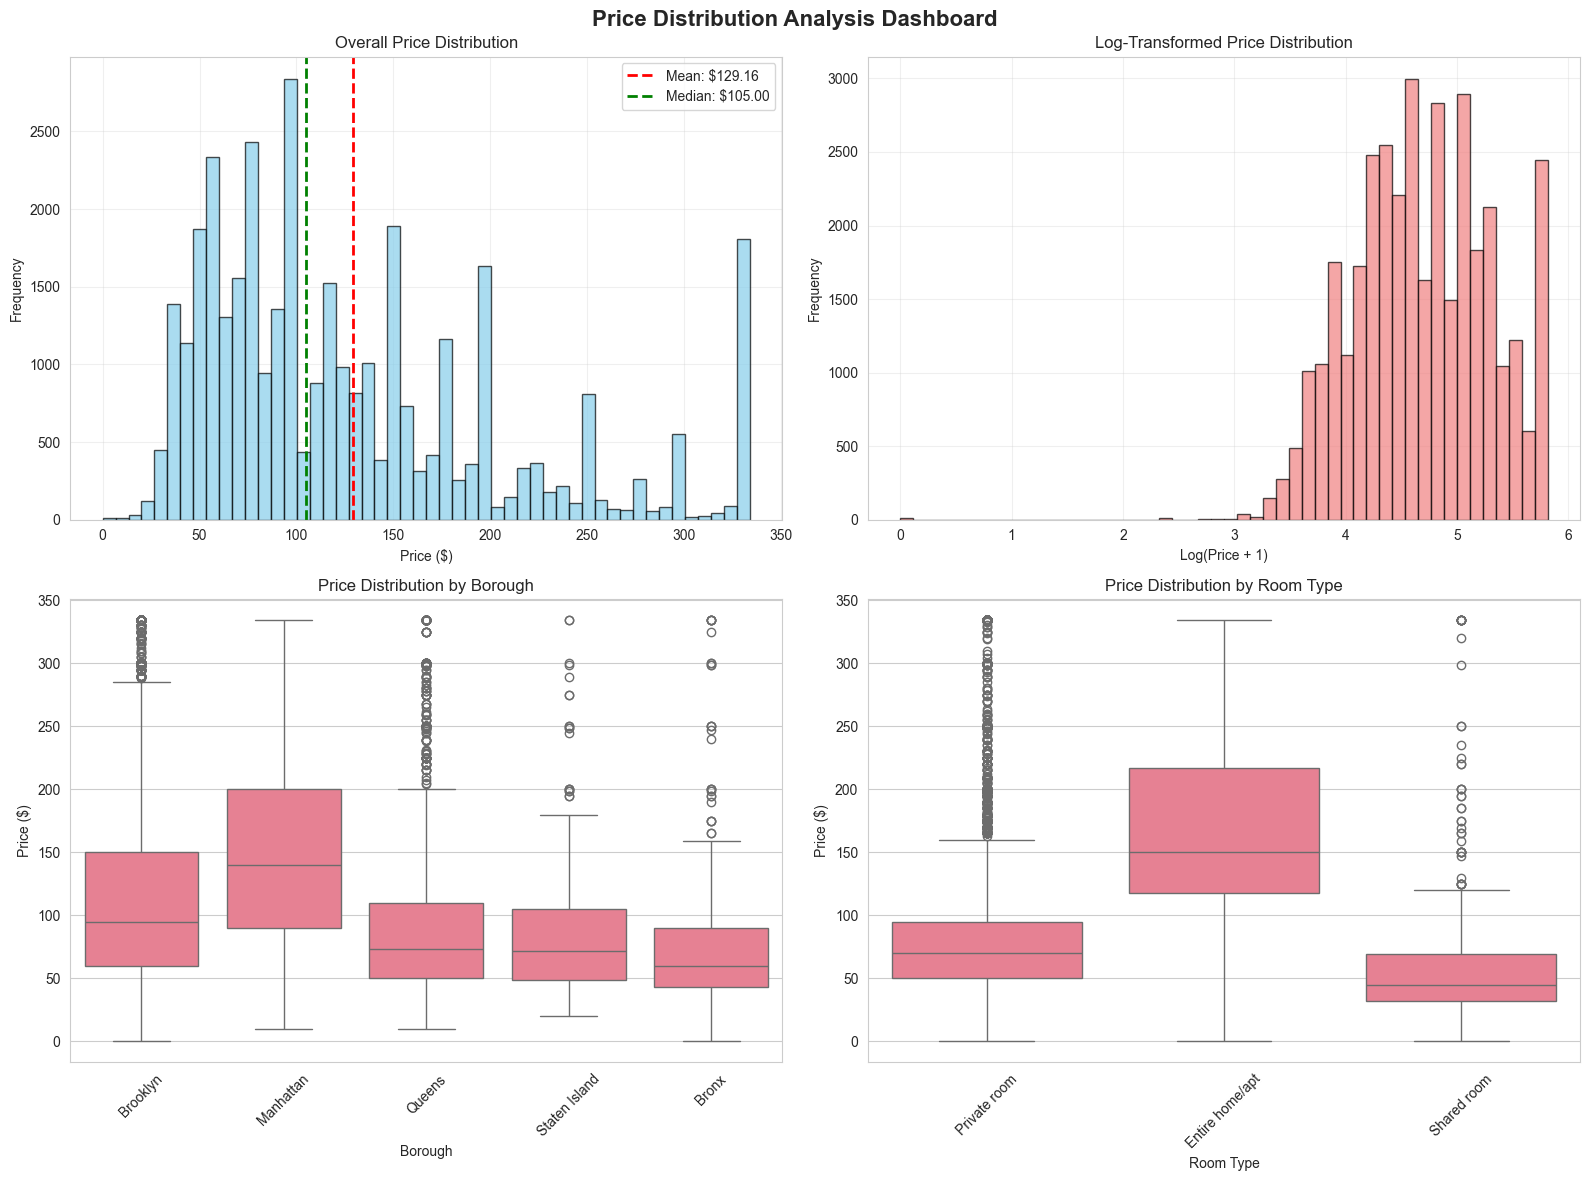


2. MARKET SHARE AND DISTRIBUTION ANALYSIS


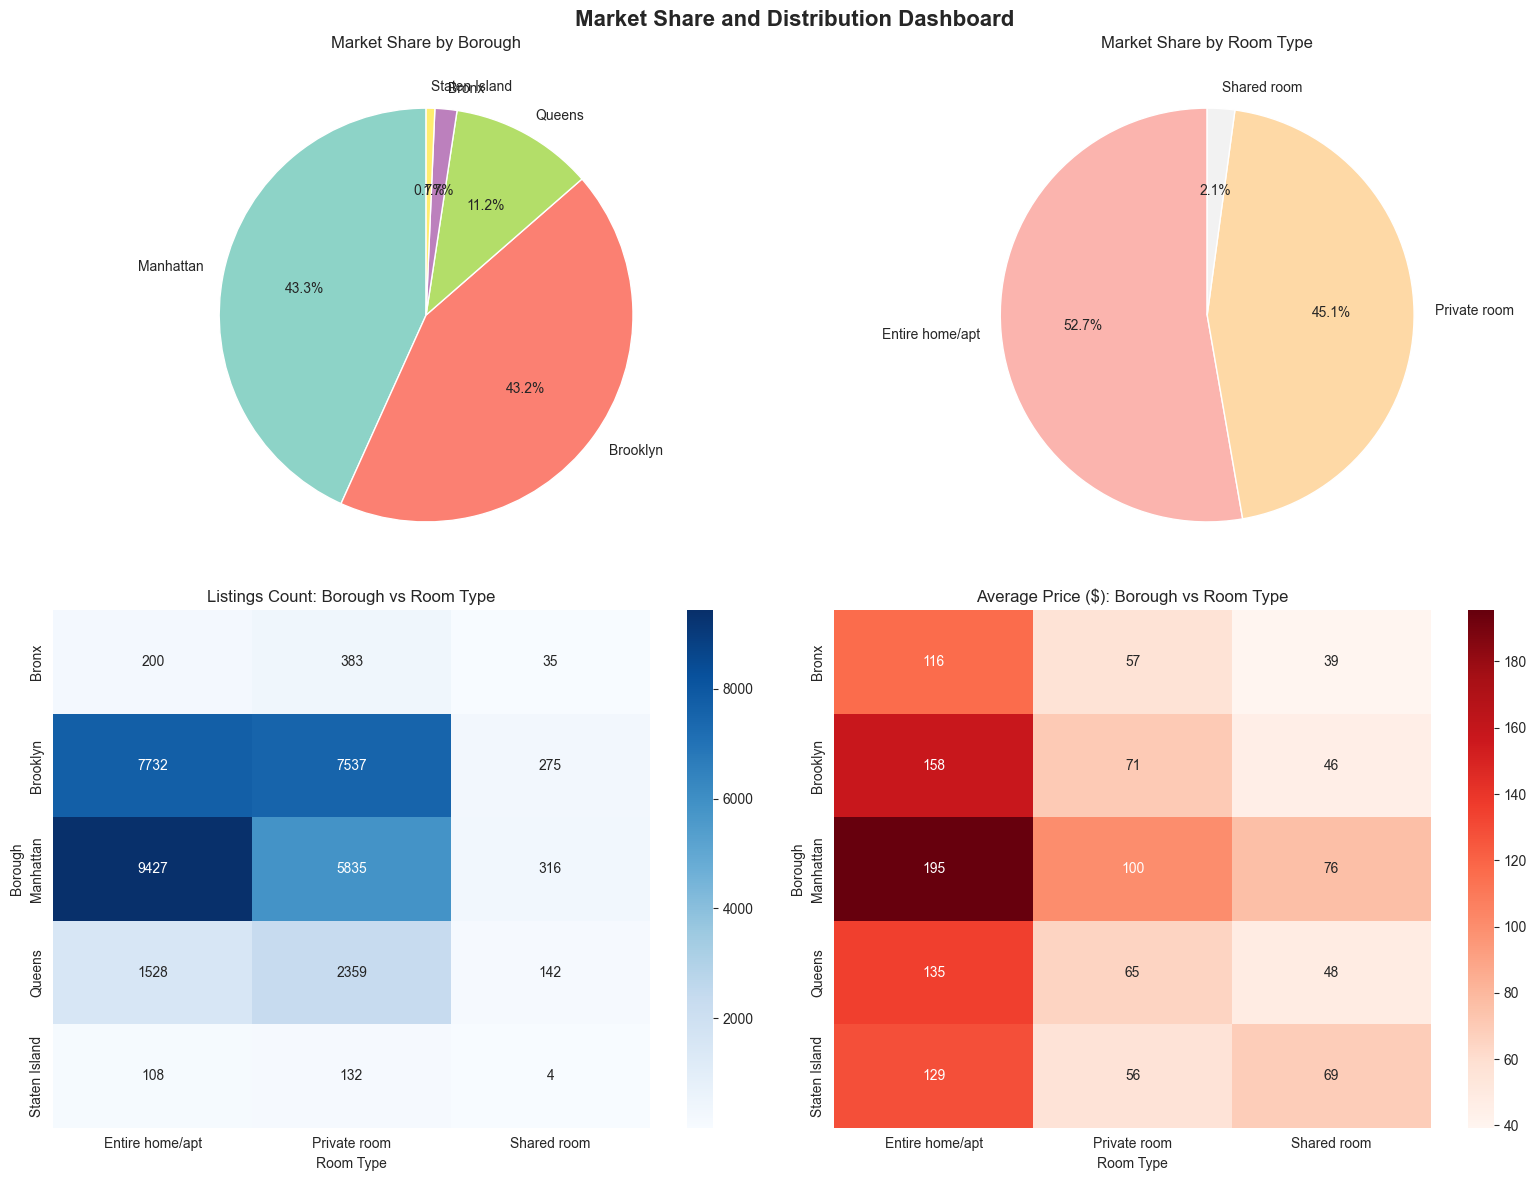


3. REVIEWS AND AVAILABILITY ANALYSIS


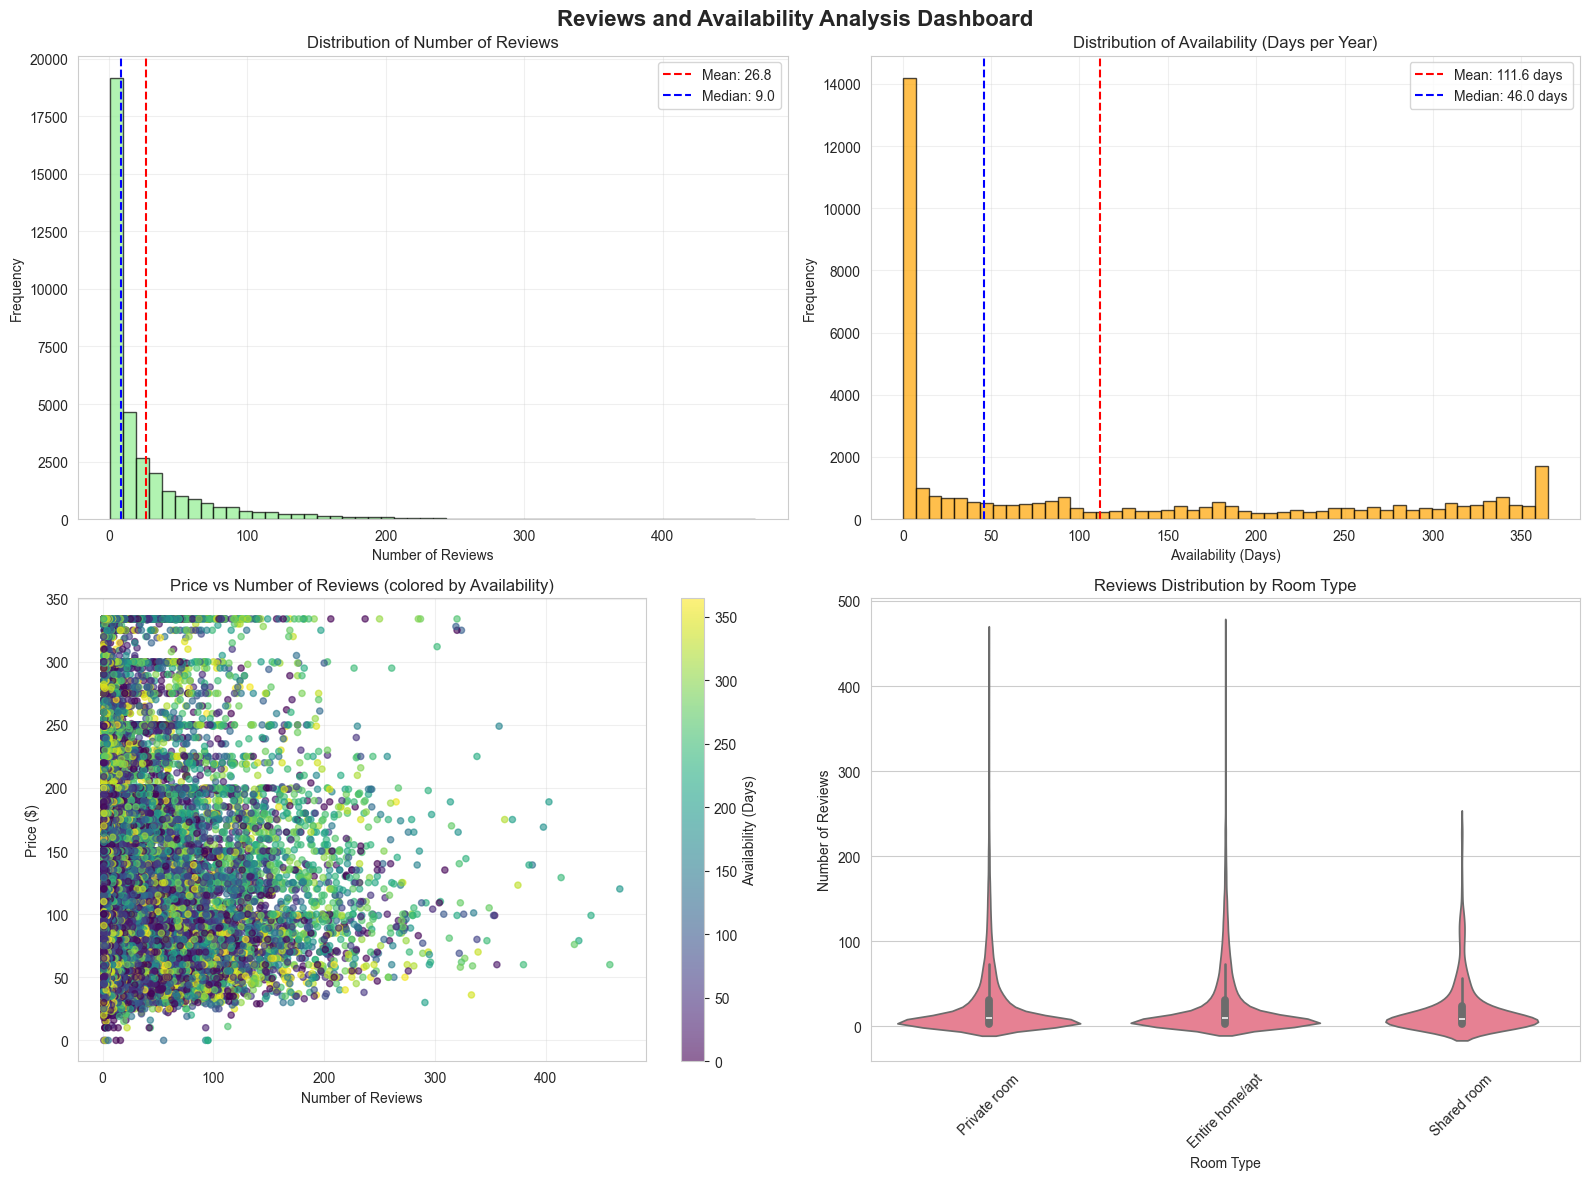


4. GEOGRAPHIC DISTRIBUTION ANALYSIS


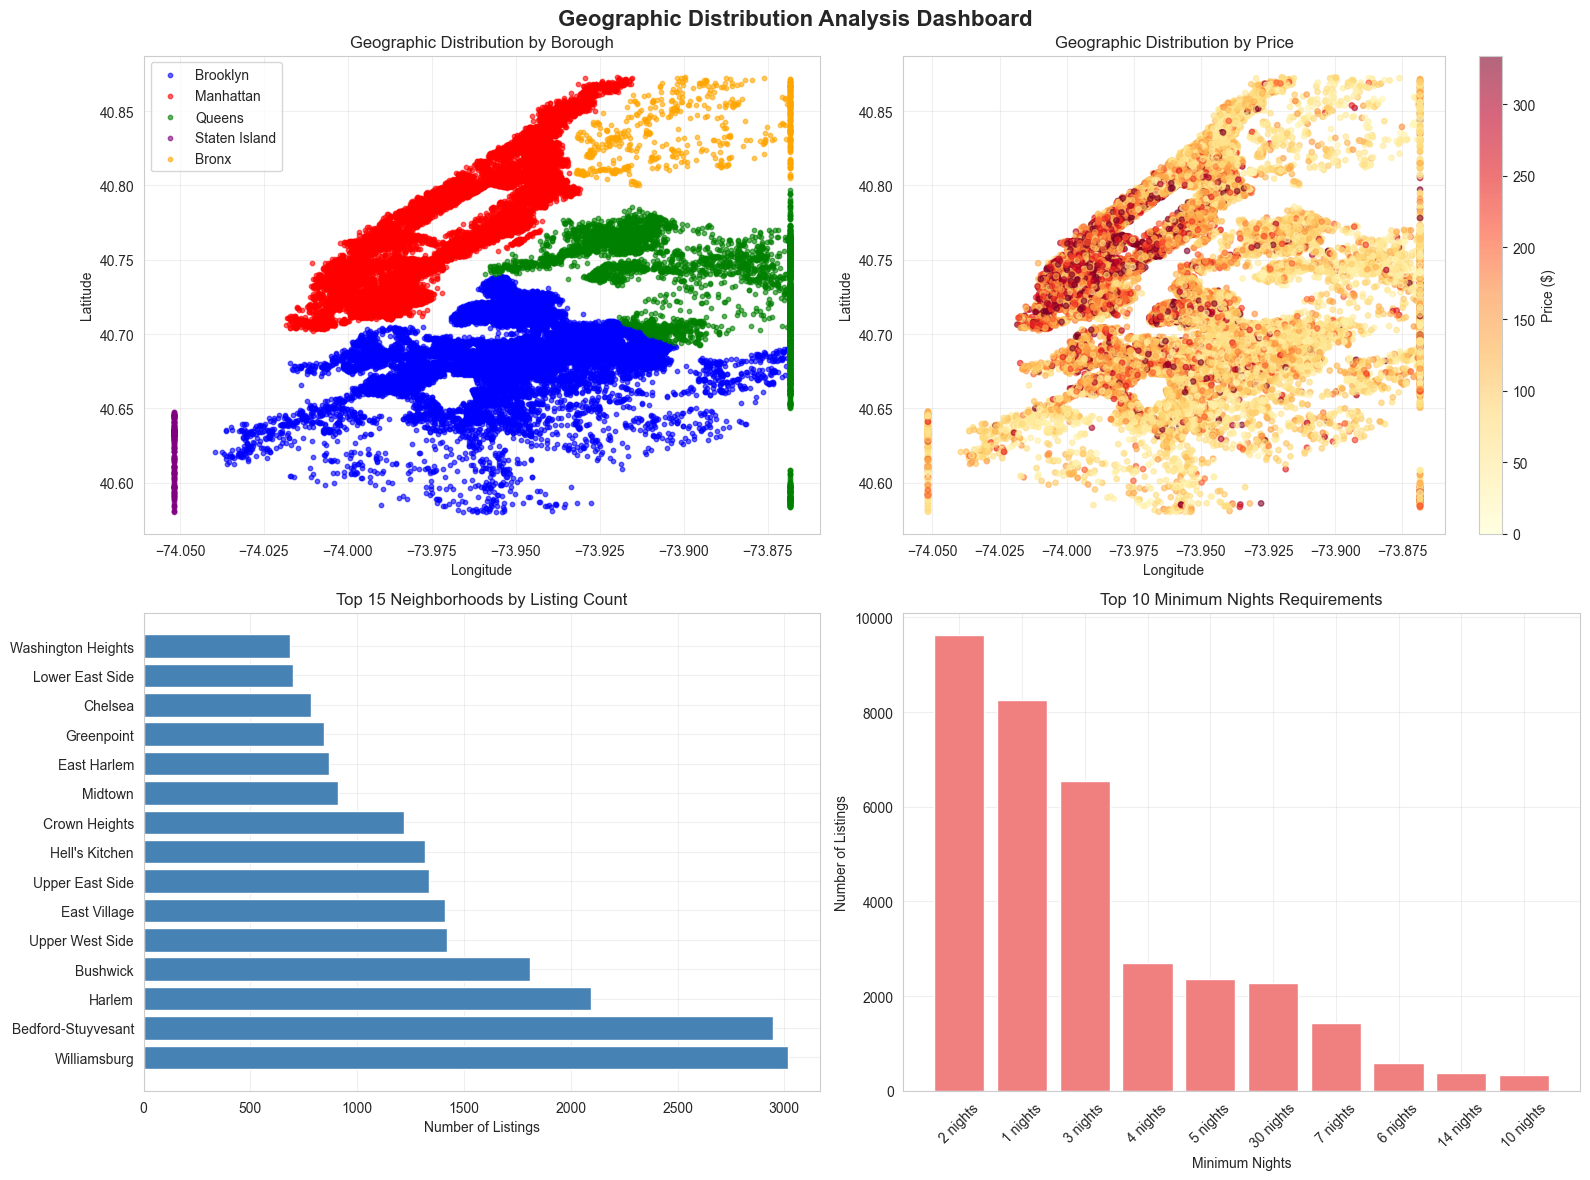


5. CORRELATION ANALYSIS


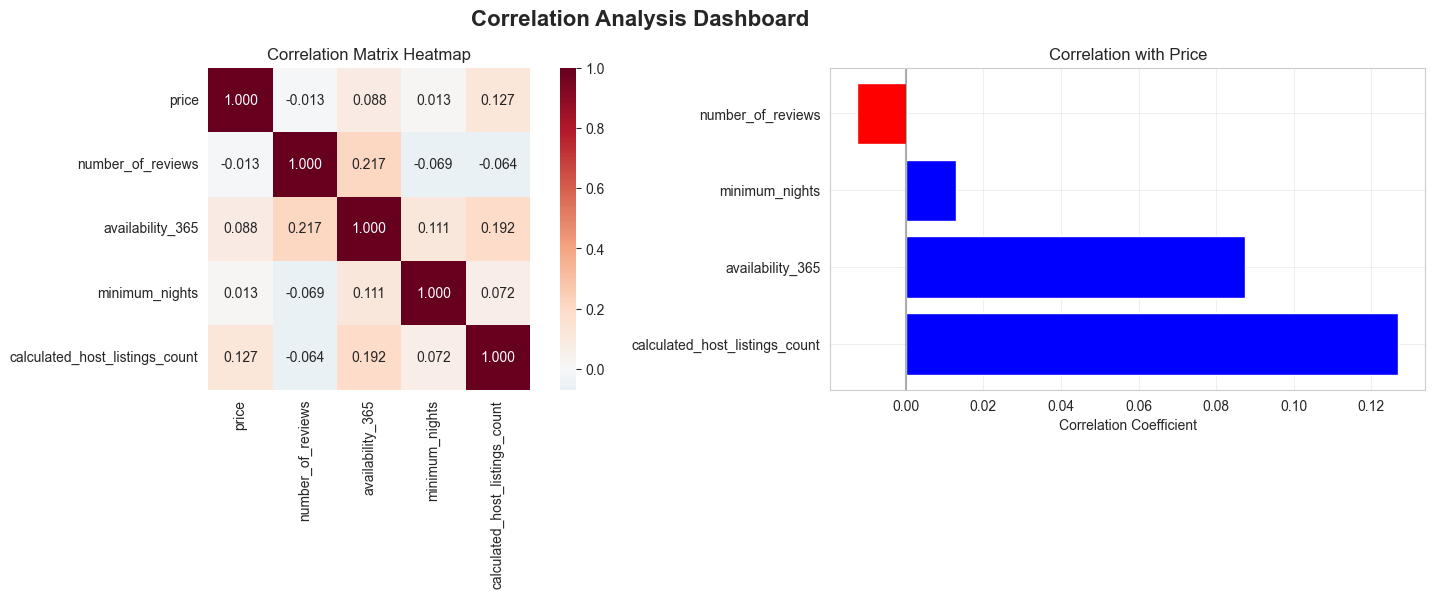


EXPLORATORY DATA ANALYSIS - VISUALIZATIONS COMPLETED

Key Visual Insights Generated:
- Price distribution patterns and outliers
- Market share analysis by borough and room type
- Geographic distribution and neighborhood analysis
- Reviews and availability patterns
- Correlation relationships between variables
- Comprehensive visual summaries


In [7]:
# TOPIC: Exploratory Data Analysis - Visualizations
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS - VISUALIZATIONS")
print("=" * 65)

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# 1. Price Distribution Analysis
print("\n1. PRICE DISTRIBUTION ANALYSIS")
print("=" * 35)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Price Distribution Analysis Dashboard', fontsize=16, fontweight='bold')

# Overall price distribution
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price"].mean():.2f}')
axes[0,0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["price"].median():.2f}')
axes[0,0].set_title('Overall Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Log-transformed price distribution
log_prices = np.log1p(df['price'])  # log(1+x) to handle zeros
axes[0,1].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Log-Transformed Price Distribution')
axes[0,1].set_xlabel('Log(Price + 1)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Price by borough
sns.boxplot(data=df, x='neighbourhood_group', y='price', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Borough')
axes[1,0].set_xlabel('Borough')
axes[1,0].set_ylabel('Price ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Price by room type
sns.boxplot(data=df, x='room_type', y='price', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Price ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Market Share and Distribution Analysis
print("\n2. MARKET SHARE AND DISTRIBUTION ANALYSIS")
print("=" * 45)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Market Share and Distribution Dashboard', fontsize=16, fontweight='bold')

# Borough market share pie chart
borough_counts = df['neighbourhood_group'].value_counts()
colors_borough = plt.cm.Set3(np.linspace(0, 1, len(borough_counts)))
wedges, texts, autotexts = axes[0,0].pie(borough_counts.values, labels=borough_counts.index, 
                                        autopct='%1.1f%%', startangle=90, colors=colors_borough)
axes[0,0].set_title('Market Share by Borough')

# Room type market share pie chart
room_counts = df['room_type'].value_counts()
colors_room = plt.cm.Pastel1(np.linspace(0, 1, len(room_counts)))
wedges, texts, autotexts = axes[0,1].pie(room_counts.values, labels=room_counts.index, 
                                        autopct='%1.1f%%', startangle=90, colors=colors_room)
axes[0,1].set_title('Market Share by Room Type')

# Borough vs Room Type heatmap
crosstab_counts = pd.crosstab(df['neighbourhood_group'], df['room_type'])
sns.heatmap(crosstab_counts, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Listings Count: Borough vs Room Type')
axes[1,0].set_xlabel('Room Type')
axes[1,0].set_ylabel('Borough')

# Average price heatmap
crosstab_prices = pd.crosstab(df['neighbourhood_group'], df['room_type'], 
                             values=df['price'], aggfunc='mean')
sns.heatmap(crosstab_prices, annot=True, fmt='.0f', cmap='Reds', ax=axes[1,1])
axes[1,1].set_title('Average Price ($): Borough vs Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Borough')

plt.tight_layout()
plt.show()

# 3. Reviews and Availability Analysis
print("\n3. REVIEWS AND AVAILABILITY ANALYSIS")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Reviews and Availability Analysis Dashboard', fontsize=16, fontweight='bold')

# Number of reviews distribution
axes[0,0].hist(df['number_of_reviews'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].axvline(df['number_of_reviews'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df["number_of_reviews"].mean():.1f}')
axes[0,0].axvline(df['number_of_reviews'].median(), color='blue', linestyle='--', 
                 label=f'Median: {df["number_of_reviews"].median():.1f}')
axes[0,0].set_title('Distribution of Number of Reviews')
axes[0,0].set_xlabel('Number of Reviews')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Availability distribution
axes[0,1].hist(df['availability_365'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].axvline(df['availability_365'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df["availability_365"].mean():.1f} days')
axes[0,1].axvline(df['availability_365'].median(), color='blue', linestyle='--', 
                 label=f'Median: {df["availability_365"].median():.1f} days')
axes[0,1].set_title('Distribution of Availability (Days per Year)')
axes[0,1].set_xlabel('Availability (Days)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Price vs Reviews scatter plot
scatter = axes[1,0].scatter(df['number_of_reviews'], df['price'], alpha=0.6, s=20, c=df['availability_365'], 
                           cmap='viridis')
axes[1,0].set_title('Price vs Number of Reviews (colored by Availability)')
axes[1,0].set_xlabel('Number of Reviews')
axes[1,0].set_ylabel('Price ($)')
plt.colorbar(scatter, ax=axes[1,0], label='Availability (Days)')
axes[1,0].grid(True, alpha=0.3)

# Reviews by room type
sns.violinplot(data=df, x='room_type', y='number_of_reviews', ax=axes[1,1])
axes[1,1].set_title('Reviews Distribution by Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Number of Reviews')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Geographic Distribution Analysis
print("\n4. GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic Distribution Analysis Dashboard', fontsize=16, fontweight='bold')

# Geographic scatter plot colored by borough
borough_colors = {'Manhattan': 'red', 'Brooklyn': 'blue', 'Queens': 'green', 
                 'Bronx': 'orange', 'Staten Island': 'purple'}
for borough in df['neighbourhood_group'].unique():
    borough_data = df[df['neighbourhood_group'] == borough]
    axes[0,0].scatter(borough_data['longitude'], borough_data['latitude'], 
                     c=borough_colors.get(borough, 'gray'), label=borough, alpha=0.6, s=10)
axes[0,0].set_title('Geographic Distribution by Borough')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Geographic scatter plot colored by price
scatter = axes[0,1].scatter(df['longitude'], df['latitude'], c=df['price'], 
                           cmap='YlOrRd', alpha=0.6, s=15)
axes[0,1].set_title('Geographic Distribution by Price')
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axes[0,1], label='Price ($)')
axes[0,1].grid(True, alpha=0.3)

# Top neighborhoods by listing count
top_neighborhoods = df['neighbourhood'].value_counts().head(15)
axes[1,0].barh(range(len(top_neighborhoods)), top_neighborhoods.values, color='steelblue')
axes[1,0].set_yticks(range(len(top_neighborhoods)))
axes[1,0].set_yticklabels(top_neighborhoods.index)
axes[1,0].set_title('Top 15 Neighborhoods by Listing Count')
axes[1,0].set_xlabel('Number of Listings')
axes[1,0].grid(True, alpha=0.3)

# Minimum nights distribution
min_nights_counts = df['minimum_nights'].value_counts().head(10)
axes[1,1].bar(range(len(min_nights_counts)), min_nights_counts.values, color='lightcoral')
axes[1,1].set_xticks(range(len(min_nights_counts)))
axes[1,1].set_xticklabels([f'{nights} nights' for nights in min_nights_counts.index])
axes[1,1].set_title('Top 10 Minimum Nights Requirements')
axes[1,1].set_xlabel('Minimum Nights')
axes[1,1].set_ylabel('Number of Listings')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
print("\n5. CORRELATION ANALYSIS")
print("=" * 25)

# Select numerical columns for correlation
numerical_cols_corr = ['price', 'number_of_reviews', 'availability_365', 
                      'minimum_nights', 'calculated_host_listings_count']
correlation_matrix = df[numerical_cols_corr].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Analysis Dashboard', fontsize=16, fontweight='bold')

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=axes[0], fmt='.3f')
axes[0].set_title('Correlation Matrix Heatmap')

# Correlation with price (bar chart)
price_correlations = correlation_matrix['price'].drop('price').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in price_correlations.values]
axes[1].barh(range(len(price_correlations)), price_correlations.values, color=colors)
axes[1].set_yticks(range(len(price_correlations)))
axes[1].set_yticklabels(price_correlations.index)
axes[1].set_title('Correlation with Price')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS - VISUALIZATIONS COMPLETED")
print("=" * 60)
print("\nKey Visual Insights Generated:")
print("- Price distribution patterns and outliers")
print("- Market share analysis by borough and room type")
print("- Geographic distribution and neighborhood analysis")
print("- Reviews and availability patterns")
print("- Correlation relationships between variables")
print("- Comprehensive visual summaries")

---
## 8. Feature Engineering for Machine Learning
Feature selection, encoding, scaling, and preparation for machine learning models

In [8]:
# TOPIC: Feature Engineering for Machine Learning
print("COMPREHENSIVE FEATURE ENGINEERING FOR MACHINE LEARNING")
print("=" * 65)

# Create a copy of the cleaned dataset for feature engineering
df_ml = df.copy()
print(f"Starting with cleaned dataset: {df_ml.shape}")

# 1. Feature Selection and Analysis
print("\n1. FEATURE SELECTION AND ANALYSIS")
print("=" * 40)

# Identify different types of features
numerical_features = df_ml.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_ml.select_dtypes(include=['object']).columns.tolist()
datetime_features = df_ml.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"DateTime features ({len(datetime_features)}): {datetime_features}")

# Remove ID columns and non-predictive features
id_columns = ['id', 'host_id']
text_columns = ['name', 'host_name']  # Text features that need special handling

print(f"\nRemoving ID columns: {id_columns}")
print(f"Text columns for special handling: {text_columns}")

# 2. Handle Missing Values (if any remain)
print("\n2. MISSING VALUES HANDLING")
print("=" * 30)

missing_summary = df_ml.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) > 0:
    print("Remaining missing values:")
    for col, count in missing_cols.items():
        print(f"   {col}: {count} ({count/len(df_ml)*100:.2f}%)")
    
    # Handle remaining missing values
    for col in missing_cols.index:
        if df_ml[col].dtype in ['int64', 'float64']:
            df_ml[col].fillna(df_ml[col].median(), inplace=True)
            print(f"   Filled {col} with median: {df_ml[col].median():.2f}")
        elif df_ml[col].dtype == 'object':
            mode_val = df_ml[col].mode().iloc[0] if not df_ml[col].mode().empty else 'Unknown'
            df_ml[col].fillna(mode_val, inplace=True)
            print(f"   Filled {col} with mode: {mode_val}")
else:
    print("No missing values found - dataset is complete!")

# 3. Feature Engineering - Create New Features
print("\n3. FEATURE ENGINEERING - NEW FEATURES")
print("=" * 45)

# Price-based features
df_ml['price_per_minimum_night'] = df_ml['price'] / df_ml['minimum_nights']
df_ml['price_log'] = np.log1p(df_ml['price'])  # Log transformation for price
print("Created price-based features: price_per_minimum_night, price_log")

# Reviews-based features
df_ml['has_reviews'] = (df_ml['number_of_reviews'] > 0).astype(int)
df_ml['reviews_log'] = np.log1p(df_ml['number_of_reviews'])
df_ml['high_review_count'] = (df_ml['number_of_reviews'] > df_ml['number_of_reviews'].quantile(0.75)).astype(int)
print("Created review-based features: has_reviews, reviews_log, high_review_count")

# Availability-based features
df_ml['availability_ratio'] = df_ml['availability_365'] / 365
df_ml['high_availability'] = (df_ml['availability_365'] > 300).astype(int)
df_ml['low_availability'] = (df_ml['availability_365'] < 30).astype(int)
print("Created availability-based features: availability_ratio, high_availability, low_availability")

# Host-based features
df_ml['is_superhost'] = (df_ml['calculated_host_listings_count'] > 5).astype(int)
df_ml['host_listings_log'] = np.log1p(df_ml['calculated_host_listings_count'])
print("Created host-based features: is_superhost, host_listings_log")

# Location-based features (if coordinates are available)
if 'latitude' in df_ml.columns and 'longitude' in df_ml.columns:
    # Distance from city center (approximate NYC center)
    nyc_center_lat, nyc_center_lon = 40.7589, -73.9851
    df_ml['distance_from_center'] = np.sqrt(
        (df_ml['latitude'] - nyc_center_lat)**2 + 
        (df_ml['longitude'] - nyc_center_lon)**2
    )
    print("Created location-based feature: distance_from_center")

# DateTime features (if available)
if 'last_review' in df_ml.columns and not df_ml['last_review'].isnull().all():
    df_ml['last_review_year'] = df_ml['last_review'].dt.year
    df_ml['last_review_month'] = df_ml['last_review'].dt.month
    df_ml['days_since_last_review'] = (pd.Timestamp.now() - df_ml['last_review']).dt.days
    print("Created datetime-based features: last_review_year, last_review_month, days_since_last_review")

print(f"\nDataset shape after feature creation: {df_ml.shape}")

# 4. Categorical Encoding
print("\n4. CATEGORICAL ENCODING")
print("=" * 25)

# One-hot encoding for categorical variables
categorical_to_encode = ['neighbourhood_group', 'room_type']

print("Applying one-hot encoding to:")
for cat_col in categorical_to_encode:
    if cat_col in df_ml.columns:
        # Get dummies
        dummies = pd.get_dummies(df_ml[cat_col], prefix=cat_col, drop_first=True)
        df_ml = pd.concat([df_ml, dummies], axis=1)
        print(f"   {cat_col}: {len(dummies.columns)} dummy variables created")

# Label encoding for high-cardinality categorical variables
if 'neighbourhood' in df_ml.columns:
    le_neighbourhood = LabelEncoder()
    df_ml['neighbourhood_encoded'] = le_neighbourhood.fit_transform(df_ml['neighbourhood'])
    print(f"   neighbourhood: Label encoded ({df_ml['neighbourhood'].nunique()} unique values)")

print(f"\nDataset shape after encoding: {df_ml.shape}")

# 5. Feature Selection for ML
print("\n5. FEATURE SELECTION FOR MACHINE LEARNING")
print("=" * 45)

# Define target variable
target_variable = 'price'
print(f"Target variable: {target_variable}")

# Select features for ML (exclude target, IDs, and original categorical columns)
exclude_columns = (['price'] + id_columns + text_columns + 
                  categorical_to_encode + ['neighbourhood'] + 
                  datetime_features)

# Get ML features
ml_features = [col for col in df_ml.columns if col not in exclude_columns]
print(f"\nSelected {len(ml_features)} features for ML:")
for i, feature in enumerate(ml_features, 1):
    print(f"   {i:2d}. {feature}")

# Create feature matrix and target vector
X = df_ml[ml_features].copy()
y = df_ml[target_variable].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Handle any remaining non-numeric data
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"\nWarning: Non-numeric columns found: {list(non_numeric_cols)}")
    # Convert or remove non-numeric columns
    X = X.select_dtypes(include=[np.number])
    print(f"Filtered to numeric columns only. New shape: {X.shape}")

# 6. Feature Scaling
print("\n6. FEATURE SCALING")
print("=" * 20)

# Initialize scalers
scaler_standard = StandardScaler()

# Fit and transform features
X_scaled = scaler_standard.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"Features scaled using StandardScaler")
print(f"Scaled features shape: {X_scaled.shape}")

# Display scaling statistics
print("\nScaling verification (first 5 features):")
scaling_stats = pd.DataFrame({
    'Feature': X.columns[:5],
    'Original_Mean': X.iloc[:, :5].mean().round(3),
    'Original_Std': X.iloc[:, :5].std().round(3),
    'Scaled_Mean': X_scaled.iloc[:, :5].mean().round(3),
    'Scaled_Std': X_scaled.iloc[:, :5].std().round(3)
})
display(scaling_stats)

# 7. Train-Test Split
print("\n7. TRAIN-TEST SPLIT")
print("=" * 20)

# Split the data
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=random_state, stratify=None
)

print(f"Train-test split completed:")
print(f"   Training set: {X_train.shape[0]:,} samples ({(1-test_size)*100:.0f}%)")
print(f"   Test set: {X_test.shape[0]:,} samples ({test_size*100:.0f}%)")
print(f"   Features: {X_train.shape[1]}")

# Display target variable statistics for both sets
print("\nTarget variable statistics:")
target_stats = pd.DataFrame({
    'Dataset': ['Training', 'Test', 'Overall'],
    'Count': [len(y_train), len(y_test), len(y)],
    'Mean': [y_train.mean(), y_test.mean(), y.mean()],
    'Median': [y_train.median(), y_test.median(), y.median()],
    'Std': [y_train.std(), y_test.std(), y.std()],
    'Min': [y_train.min(), y_test.min(), y.min()],
    'Max': [y_train.max(), y_test.max(), y.max()]
}).round(2)

display(target_stats)

# 8. Feature Importance Analysis (using correlation)
print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("=" * 35)

# Calculate correlation with target
feature_correlations = X.corrwith(y).abs().sort_values(ascending=False)

print("Top 10 features by correlation with price:")
top_features = feature_correlations.head(10)
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"   {i:2d}. {feature:<30} {corr:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features.plot(kind='barh', color='steelblue')
plt.title('Top 10 Features by Correlation with Price', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation with Price')
plt.ylabel('Features')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Final Dataset Summary
print("\n9. FINAL DATASET SUMMARY")
print("=" * 30)

print(f"Original dataset shape: {df.shape}")
print(f"Final ML dataset shape: {X_scaled.shape}")
print(f"Features created: {X_scaled.shape[1] - len(numerical_features) + len(exclude_columns)}")
print(f"Target variable: {target_variable}")
print(f"Ready for machine learning: YES")

# Store processed data for next sections
print("\nDatasets prepared for machine learning:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")

print("\n" + "=" * 60)
print("FEATURE ENGINEERING FOR MACHINE LEARNING COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print("- Created meaningful derived features")
print("- Properly encoded categorical variables")
print("- Scaled features for ML algorithms")
print("- Split data into train/test sets")
print("- Analyzed feature importance")
print("- Prepared clean ML-ready datasets")

COMPREHENSIVE FEATURE ENGINEERING FOR MACHINE LEARNING
Starting with cleaned dataset: (36013, 16)

1. FEATURE SELECTION AND ANALYSIS
Numerical features (10): ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical features (6): ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
DateTime features (0): []

Removing ID columns: ['id', 'host_id']
Text columns for special handling: ['name', 'host_name']

2. MISSING VALUES HANDLING
Remaining missing values:
   name: 6 (0.02%)
   host_name: 13 (0.04%)
   Filled name with mode: Loft Suite @ The Box House Hotel
   Filled host_name with mode: Michael

3. FEATURE ENGINEERING - NEW FEATURES
Created price-based features: price_per_minimum_night, price_log
Created review-based features: has_reviews, reviews_log, high_review_count
Created availability-based features: availability_ratio, high_

AttributeError: Can only use .dt accessor with datetimelike values

---
## 9. K-means Clustering Analysis
Market segmentation using K-means clustering with elbow method and comprehensive cluster analysis

In [1]:
# TOPIC: K-means Clustering Analysis
print("COMPREHENSIVE K-MEANS CLUSTERING ANALYSIS")
print("=" * 50)

# Use the scaled features for clustering
print(f"Using scaled feature matrix for clustering: {X_scaled.shape}")

# 1. Determine Optimal Number of Clusters - Elbow Method
print("\n1. DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("=" * 45)

# Test different numbers of clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing K values from 2 to 10...")
for k in k_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette_avg)
    
    print(f"   K={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette_avg:.4f}")

# Visualize elbow method and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Optimal Number of Clusters Analysis', fontsize=16, fontweight='bold')

# Elbow method plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_title('Elbow Method for Optimal K')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)')
axes[0].grid(True, alpha=0.3)

# Silhouette score plot
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_title('Silhouette Score for Different K')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal K based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\nOptimal number of clusters based on silhouette score: K = {optimal_k}")
print(f"Best silhouette score: {best_silhouette:.4f}")

# 2. Apply K-means with Optimal K
print("\n2. APPLYING K-MEANS WITH OPTIMAL K")
print("=" * 40)

# Fit final K-means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df_ml.copy()
df_clustered['cluster'] = cluster_labels

print(f"K-means clustering completed with K = {optimal_k}")
print(f"Final inertia: {final_kmeans.inertia_:.2f}")
print(f"Final silhouette score: {silhouette_score(X_scaled, cluster_labels):.4f}")

# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\nCluster distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"   Cluster {cluster_id}: {count:,} listings ({percentage:.2f}%)")

# 3. Cluster Analysis and Profiling
print("\n3. CLUSTER ANALYSIS AND PROFILING")
print("=" * 40)

# Analyze clusters using original features
key_features = ['price', 'number_of_reviews', 'availability_365', 'minimum_nights', 
               'calculated_host_listings_count']

cluster_profiles = df_clustered.groupby('cluster')[key_features].agg(['mean', 'median', 'std']).round(2)

print("\nCluster Profiles (Key Numerical Features):")
display(cluster_profiles)

# 4. Cluster Visualization
print("\n4. CLUSTER VISUALIZATION")
print("=" * 25)

# Create comprehensive cluster visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'K-means Clustering Analysis Dashboard (K={optimal_k})', fontsize=16, fontweight='bold')

# 1. Price vs Reviews colored by cluster
scatter = axes[0,0].scatter(df_clustered['number_of_reviews'], df_clustered['price'], 
                           c=df_clustered['cluster'], cmap='viridis', alpha=0.6, s=20)
axes[0,0].set_title('Price vs Reviews by Cluster')
axes[0,0].set_xlabel('Number of Reviews')
axes[0,0].set_ylabel('Price ($)')
plt.colorbar(scatter, ax=axes[0,0], label='Cluster')
axes[0,0].grid(True, alpha=0.3)

# 2. Availability vs Price colored by cluster
scatter = axes[0,1].scatter(df_clustered['availability_365'], df_clustered['price'], 
                           c=df_clustered['cluster'], cmap='viridis', alpha=0.6, s=20)
axes[0,1].set_title('Availability vs Price by Cluster')
axes[0,1].set_xlabel('Availability (Days)')
axes[0,1].set_ylabel('Price ($)')
plt.colorbar(scatter, ax=axes[0,1], label='Cluster')
axes[0,1].grid(True, alpha=0.3)

# 3. Cluster size distribution
cluster_counts.plot(kind='bar', ax=axes[1,0], color='steelblue')
axes[1,0].set_title('Cluster Size Distribution')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Number of Listings')
axes[1,0].tick_params(axis='x', rotation=0)
axes[1,0].grid(True, alpha=0.3)

# 4. Average price by cluster
avg_price_by_cluster = df_clustered.groupby('cluster')['price'].mean()
avg_price_by_cluster.plot(kind='bar', ax=axes[1,1], color='lightcoral')
axes[1,1].set_title('Average Price by Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Average Price ($)')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Business Insights and Cluster Interpretation
print("\n5. BUSINESS INSIGHTS AND CLUSTER INTERPRETATION")
print("=" * 55)

print("\nCluster Interpretation based on key characteristics:")

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    avg_price = cluster_data['price'].mean()
    avg_reviews = cluster_data['number_of_reviews'].mean()
    avg_availability = cluster_data['availability_365'].mean()
    
    print(f"\nCluster {cluster_id} ({len(cluster_data):,} listings):")
    print(f"   Average Price: ${avg_price:.2f}")
    print(f"   Average Reviews: {avg_reviews:.1f}")
    print(f"   Average Availability: {avg_availability:.1f} days")
    
    # Cluster characterization
    if avg_price > df_clustered['price'].mean():
        price_level = "High-priced"
    elif avg_price < df_clustered['price'].mean() * 0.8:
        price_level = "Budget-friendly"
    else:
        price_level = "Mid-range"
    
    if avg_reviews > df_clustered['number_of_reviews'].mean():
        review_level = "High-reviewed"
    else:
        review_level = "Low-reviewed"
    
    print(f"   Characterization: {price_level}, {review_level}")

print("\n" + "=" * 60)
print("K-MEANS CLUSTERING ANALYSIS COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print(f"- Determined optimal number of clusters using elbow method")
print("- Applied K-means clustering with optimal parameters")
print("- Created comprehensive cluster profiles")
print("- Generated business insights for market segmentation")
print("- Visualized clusters across multiple dimensions")
print("- Provided actionable cluster interpretations")

COMPREHENSIVE K-MEANS CLUSTERING ANALYSIS


NameError: name 'X_scaled' is not defined

---
## 10. Cluster Visualization and Analysis
Advanced multi-dimensional cluster visualization, geographic analysis, and detailed cluster characteristics

In [2]:
# TOPIC: Cluster Visualization and Analysis
print("ADVANCED CLUSTER VISUALIZATION AND ANALYSIS")
print("=" * 50)

# Ensure we have the clustered data from previous section
print(f"Analyzing {optimal_k} clusters with {len(df_clustered):,} total listings")

# 1. Multi-dimensional Cluster Visualization
print("\n1. MULTI-DIMENSIONAL CLUSTER VISUALIZATION")
print("=" * 50)

# Create comprehensive multi-panel visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Comprehensive Multi-Dimensional Cluster Analysis', fontsize=18, fontweight='bold')

# Define color palette for clusters
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))

# 1.1 Price vs Number of Reviews
for i, cluster_id in enumerate(range(optimal_k)):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[0,0].scatter(cluster_data['number_of_reviews'], cluster_data['price'], 
                     c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=30)
axes[0,0].set_title('Price vs Number of Reviews by Cluster')
axes[0,0].set_xlabel('Number of Reviews')
axes[0,0].set_ylabel('Price ($)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 1.2 Availability vs Price
for i, cluster_id in enumerate(range(optimal_k)):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[0,1].scatter(cluster_data['availability_365'], cluster_data['price'], 
                     c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=30)
axes[0,1].set_title('Availability vs Price by Cluster')
axes[0,1].set_xlabel('Availability (Days per Year)')
axes[0,1].set_ylabel('Price ($)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 1.3 Minimum Nights vs Price
for i, cluster_id in enumerate(range(optimal_k)):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[0,2].scatter(cluster_data['minimum_nights'], cluster_data['price'], 
                     c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=30)
axes[0,2].set_title('Minimum Nights vs Price by Cluster')
axes[0,2].set_xlabel('Minimum Nights')
axes[0,2].set_ylabel('Price ($)')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 1.4 Host Listings vs Price
for i, cluster_id in enumerate(range(optimal_k)):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[1,0].scatter(cluster_data['calculated_host_listings_count'], cluster_data['price'], 
                     c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=30)
axes[1,0].set_title('Host Listings Count vs Price by Cluster')
axes[1,0].set_xlabel('Host Listings Count')
axes[1,0].set_ylabel('Price ($)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 1.5 Reviews vs Availability
for i, cluster_id in enumerate(range(optimal_k)):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    axes[1,1].scatter(cluster_data['number_of_reviews'], cluster_data['availability_365'], 
                     c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=30)
axes[1,1].set_title('Reviews vs Availability by Cluster')
axes[1,1].set_xlabel('Number of Reviews')
axes[1,1].set_ylabel('Availability (Days)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 1.6 Price Distribution by Cluster (Box Plot)
cluster_price_data = [df_clustered[df_clustered['cluster'] == i]['price'] for i in range(optimal_k)]
box_plot = axes[1,2].boxplot(cluster_price_data, labels=[f'C{i}' for i in range(optimal_k)], patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1,2].set_title('Price Distribution by Cluster')
axes[1,2].set_xlabel('Cluster')
axes[1,2].set_ylabel('Price ($)')
axes[1,2].grid(True, alpha=0.3)

# 1.7 Reviews Distribution by Cluster (Violin Plot)
cluster_review_data = [df_clustered[df_clustered['cluster'] == i]['number_of_reviews'] for i in range(optimal_k)]
violin_parts = axes[2,0].violinplot(cluster_review_data, positions=range(optimal_k), showmeans=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
axes[2,0].set_title('Reviews Distribution by Cluster')
axes[2,0].set_xlabel('Cluster')
axes[2,0].set_ylabel('Number of Reviews')
axes[2,0].set_xticks(range(optimal_k))
axes[2,0].set_xticklabels([f'C{i}' for i in range(optimal_k)])
axes[2,0].grid(True, alpha=0.3)

# 1.8 Availability Distribution by Cluster
cluster_avail_data = [df_clustered[df_clustered['cluster'] == i]['availability_365'] for i in range(optimal_k)]
violin_parts = axes[2,1].violinplot(cluster_avail_data, positions=range(optimal_k), showmeans=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
axes[2,1].set_title('Availability Distribution by Cluster')
axes[2,1].set_xlabel('Cluster')
axes[2,1].set_ylabel('Availability (Days)')
axes[2,1].set_xticks(range(optimal_k))
axes[2,1].set_xticklabels([f'C{i}' for i in range(optimal_k)])
axes[2,1].grid(True, alpha=0.3)

# 1.9 Cluster Size and Average Metrics
cluster_summary = df_clustered.groupby('cluster').agg({
    'price': ['count', 'mean'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

cluster_sizes = cluster_summary[('price', 'count')]
bars = axes[2,2].bar(range(optimal_k), cluster_sizes, color=colors, alpha=0.7)
axes[2,2].set_title('Cluster Sizes')
axes[2,2].set_xlabel('Cluster')
axes[2,2].set_ylabel('Number of Listings')
axes[2,2].set_xticks(range(optimal_k))
axes[2,2].set_xticklabels([f'C{i}' for i in range(optimal_k)])

# Add value labels on bars
for i, (bar, size) in enumerate(zip(bars, cluster_sizes)):
    axes[2,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(cluster_sizes)*0.01,
                  f'{size}', ha='center', va='bottom', fontweight='bold')
axes[2,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Geographic Cluster Analysis
print("\n2. GEOGRAPHIC CLUSTER ANALYSIS")
print("=" * 35)

if 'latitude' in df_clustered.columns and 'longitude' in df_clustered.columns:
    # Create geographic visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Geographic Distribution of Clusters', fontsize=16, fontweight='bold')
    
    # Geographic scatter plot by cluster
    for i, cluster_id in enumerate(range(optimal_k)):
        cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
        axes[0].scatter(cluster_data['longitude'], cluster_data['latitude'], 
                       c=[colors[i]], label=f'Cluster {cluster_id}', alpha=0.6, s=15)
    
    axes[0].set_title('Geographic Distribution by Cluster')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Geographic scatter plot sized by price
    scatter = axes[1].scatter(df_clustered['longitude'], df_clustered['latitude'], 
                             c=df_clustered['cluster'], s=df_clustered['price']/10, 
                             cmap='viridis', alpha=0.6)
    axes[1].set_title('Geographic Distribution (Size = Price, Color = Cluster)')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    plt.colorbar(scatter, ax=axes[1], label='Cluster')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Geographic cluster statistics
    print("\nGeographic cluster statistics:")
    geo_stats = df_clustered.groupby('cluster')[['latitude', 'longitude']].agg(['mean', 'std']).round(4)
    display(geo_stats)
    
else:
    print("Geographic coordinates not available for analysis.")

# 3. Categorical Feature Analysis by Cluster
print("\n3. CATEGORICAL FEATURE ANALYSIS BY CLUSTER")
print("=" * 50)

# Borough analysis by cluster
if 'neighbourhood_group' in df_clustered.columns:
    print("\nBorough Distribution by Cluster:")
    borough_cluster = pd.crosstab(df_clustered['cluster'], df_clustered['neighbourhood_group'])
    borough_cluster_pct = pd.crosstab(df_clustered['cluster'], df_clustered['neighbourhood_group'], normalize='index') * 100
    
    # Display counts
    print("\nCounts:")
    display(borough_cluster)
    
    # Display percentages
    print("\nPercentages:")
    display(borough_cluster_pct.round(1))
    
    # Visualize borough distribution
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Borough Distribution by Cluster', fontsize=14, fontweight='bold')
    
    # Stacked bar chart (counts)
    borough_cluster.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set3')
    axes[0].set_title('Borough Counts by Cluster')
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Number of Listings')
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Stacked bar chart (percentages)
    borough_cluster_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
    axes[1].set_title('Borough Percentages by Cluster')
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Room type analysis by cluster
if 'room_type' in df_clustered.columns:
    print("\nRoom Type Distribution by Cluster:")
    room_cluster = pd.crosstab(df_clustered['cluster'], df_clustered['room_type'])
    room_cluster_pct = pd.crosstab(df_clustered['cluster'], df_clustered['room_type'], normalize='index') * 100
    
    # Display counts and percentages
    print("\nCounts:")
    display(room_cluster)
    print("\nPercentages:")
    display(room_cluster_pct.round(1))
    
    # Visualize room type distribution
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    room_cluster_pct.plot(kind='bar', ax=ax, colormap='Pastel1')
    ax.set_title('Room Type Distribution by Cluster (%)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Percentage (%)')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 4. Advanced Cluster Metrics and Comparison
print("\n4. ADVANCED CLUSTER METRICS AND COMPARISON")
print("=" * 50)

# Comprehensive cluster comparison table
cluster_comparison = df_clustered.groupby('cluster').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'number_of_reviews': ['mean', 'median', 'std'],
    'availability_365': ['mean', 'median', 'std'],
    'minimum_nights': ['mean', 'median'],
    'calculated_host_listings_count': ['mean', 'median']
}).round(2)

print("\nComprehensive Cluster Comparison:")
display(cluster_comparison)

# Calculate cluster separation metrics
print("\nCluster Separation Analysis:")
cluster_centers = final_kmeans.cluster_centers_
print(f"Number of cluster centers: {len(cluster_centers)}")
print(f"Feature dimensions: {cluster_centers.shape[1]}")

# Calculate distances between cluster centers
from scipy.spatial.distance import pdist, squareform
center_distances = pdist(cluster_centers)
distance_matrix = squareform(center_distances)

print("\nDistances between cluster centers:")
distance_df = pd.DataFrame(distance_matrix, 
                          index=[f'Cluster {i}' for i in range(optimal_k)],
                          columns=[f'Cluster {i}' for i in range(optimal_k)])
display(distance_df.round(3))

# 5. Cluster Business Value Analysis
print("\n5. CLUSTER BUSINESS VALUE ANALYSIS")
print("=" * 40)

# Calculate business metrics for each cluster
business_metrics = []

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    # Calculate key business metrics
    avg_price = cluster_data['price'].mean()
    median_price = cluster_data['price'].median()
    price_std = cluster_data['price'].std()
    avg_reviews = cluster_data['number_of_reviews'].mean()
    avg_availability = cluster_data['availability_365'].mean()
    avg_min_nights = cluster_data['minimum_nights'].mean()
    
    # Revenue potential (simplified)
    revenue_potential = avg_price * (365 - avg_availability) if avg_availability < 365 else avg_price * 300
    
    # Market attractiveness score (0-100)
    price_score = min(100, (avg_price / df_clustered['price'].max()) * 100)
    review_score = min(100, (avg_reviews / df_clustered['number_of_reviews'].max()) * 100)
    availability_score = (avg_availability / 365) * 100
    
    attractiveness_score = (price_score * 0.4 + review_score * 0.3 + availability_score * 0.3)
    
    business_metrics.append({
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Avg_Price': avg_price,
        'Price_Volatility': price_std,
        'Avg_Reviews': avg_reviews,
        'Avg_Availability': avg_availability,
        'Revenue_Potential': revenue_potential,
        'Attractiveness_Score': attractiveness_score
    })

business_df = pd.DataFrame(business_metrics).round(2)
print("\nBusiness Value Analysis by Cluster:")
display(business_df)

# Rank clusters by different metrics
print("\nCluster Rankings:")
print(f"By Average Price: {business_df.nlargest(optimal_k, 'Avg_Price')['Cluster'].tolist()}")
print(f"By Revenue Potential: {business_df.nlargest(optimal_k, 'Revenue_Potential')['Cluster'].tolist()}")
print(f"By Market Attractiveness: {business_df.nlargest(optimal_k, 'Attractiveness_Score')['Cluster'].tolist()}")
print(f"By Size: {business_df.nlargest(optimal_k, 'Size')['Cluster'].tolist()}")

print("\n" + "=" * 60)
print("CLUSTER VISUALIZATION AND ANALYSIS COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print("- Created comprehensive multi-dimensional visualizations")
print("- Analyzed geographic distribution of clusters")
print("- Examined categorical feature patterns by cluster")
print("- Calculated advanced cluster separation metrics")
print("- Developed business value analysis framework")
print("- Provided actionable cluster rankings and insights")

ADVANCED CLUSTER VISUALIZATION AND ANALYSIS


NameError: name 'optimal_k' is not defined

---
## 11. Minimum Distance Classifier Implementation
Custom implementation of minimum distance classifier using cluster centroids for price category prediction

In [ ]:
# TOPIC: Minimum Distance Classifier Implementation
print("MINIMUM DISTANCE CLASSIFIER IMPLEMENTATION")
print("=" * 50)

# 1. Create Price Categories for Classification
print("\n1. CREATING PRICE CATEGORIES FOR CLASSIFICATION")
print("=" * 55)

# Define price categories based on quantiles
price_quantiles = df_clustered['price'].quantile([0.33, 0.67])
low_threshold = price_quantiles[0.33]
high_threshold = price_quantiles[0.67]

print(f"Price category thresholds:")
print(f"   Low: < ${low_threshold:.2f}")
print(f"   Medium: ${low_threshold:.2f} - ${high_threshold:.2f}")
print(f"   High: > ${high_threshold:.2f}")

# Create price categories
def categorize_price(price):
    if price < low_threshold:
        return 0  # Low
    elif price < high_threshold:
        return 1  # Medium
    else:
        return 2  # High

# Apply categorization
df_classifier = df_clustered.copy()
df_classifier['price_category'] = df_classifier['price'].apply(categorize_price)

# Display category distribution
category_counts = df_classifier['price_category'].value_counts().sort_index()
category_labels = ['Low', 'Medium', 'High']

print(f"\nPrice category distribution:")
for cat_id, count in category_counts.items():
    percentage = (count / len(df_classifier)) * 100
    print(f"   {category_labels[cat_id]}: {count:,} listings ({percentage:.2f}%)")

# 2. Prepare Features for Classification
print("\n2. PREPARING FEATURES FOR CLASSIFICATION")
print("=" * 45)

# Select features for classification (excluding price and price_category)
classifier_features = ['number_of_reviews', 'availability_365', 'minimum_nights', 
                      'calculated_host_listings_count']

# Add engineered features if they exist
engineered_features = ['has_reviews', 'high_review_count', 'availability_ratio', 
                      'high_availability', 'low_availability', 'is_superhost']

available_features = [f for f in engineered_features if f in df_classifier.columns]
classifier_features.extend(available_features)

print(f"Features selected for classification ({len(classifier_features)}):")
for i, feature in enumerate(classifier_features, 1):
    print(f"   {i:2d}. {feature}")

# Prepare feature matrix and target
X_classifier = df_classifier[classifier_features].copy()
y_classifier = df_classifier['price_category'].copy()

# Handle any missing values
X_classifier = X_classifier.fillna(X_classifier.median())

print(f"\nClassifier dataset shape: {X_classifier.shape}")
print(f"Target distribution: {y_classifier.value_counts().sort_index().tolist()}")

# 3. Scale Features for Distance Calculation
print("\n3. SCALING FEATURES FOR DISTANCE CALCULATION")
print("=" * 50)

# Scale features using StandardScaler
scaler_classifier = StandardScaler()
X_classifier_scaled = scaler_classifier.fit_transform(X_classifier)
X_classifier_scaled = pd.DataFrame(X_classifier_scaled, columns=X_classifier.columns, index=X_classifier.index)

print(f"Features scaled successfully")
print(f"Scaled features shape: {X_classifier_scaled.shape}")

# Verify scaling
print(f"\nScaling verification (mean ≈ 0, std ≈ 1):")
print(f"   Mean range: [{X_classifier_scaled.mean().min():.6f}, {X_classifier_scaled.mean().max():.6f}]")
print(f"   Std range: [{X_classifier_scaled.std().min():.6f}, {X_classifier_scaled.std().max():.6f}]")

# 4. Train-Test Split for Classification
print("\n4. TRAIN-TEST SPLIT FOR CLASSIFICATION")
print("=" * 40)

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classifier_scaled, y_classifier, test_size=0.2, random_state=42, stratify=y_classifier
)

print(f"Classification train-test split:")
print(f"   Training set: {X_train_clf.shape[0]:,} samples")
print(f"   Test set: {X_test_clf.shape[0]:,} samples")
print(f"   Features: {X_train_clf.shape[1]}")

# Display class distribution in train/test sets
train_dist = y_train_clf.value_counts().sort_index()
test_dist = y_test_clf.value_counts().sort_index()

print(f"\nClass distribution:")
for i, label in enumerate(category_labels):
    train_pct = (train_dist[i] / len(y_train_clf)) * 100
    test_pct = (test_dist[i] / len(y_test_clf)) * 100
    print(f"   {label}: Train {train_dist[i]} ({train_pct:.1f}%), Test {test_dist[i]} ({test_pct:.1f}%)")

# 5. Calculate Class Centroids
print("\n5. CALCULATING CLASS CENTROIDS")
print("=" * 35)

# Calculate centroids for each price category using training data
class_centroids = {}
centroid_stats = []

for class_id in range(3):  # 0, 1, 2 for Low, Medium, High
    # Get training samples for this class
    class_mask = y_train_clf == class_id
    class_samples = X_train_clf[class_mask]
    
    # Calculate centroid (mean of all samples in this class)
    centroid = class_samples.mean(axis=0)
    class_centroids[class_id] = centroid
    
    # Calculate statistics
    centroid_stats.append({
        'Class': category_labels[class_id],
        'Class_ID': class_id,
        'Sample_Count': len(class_samples),
        'Centroid_Norm': np.linalg.norm(centroid)
    })
    
    print(f"\n{category_labels[class_id]} Price Category (Class {class_id}):")
    print(f"   Training samples: {len(class_samples):,}")
    print(f"   Centroid norm: {np.linalg.norm(centroid):.4f}")
    print(f"   Top 3 feature values: {centroid.nlargest(3).round(4).to_dict()}")

# Display centroid statistics
centroid_df = pd.DataFrame(centroid_stats)
print(f"\nCentroid Summary:")
display(centroid_df)

# 6. Implement Minimum Distance Classifier
print("\n6. IMPLEMENTING MINIMUM DISTANCE CLASSIFIER")
print("=" * 50)

class MinimumDistanceClassifier:
    def __init__(self, distance_metric='euclidean'):
        self.distance_metric = distance_metric
        self.centroids = {}
        self.classes = []
        self.feature_names = []
    
    def fit(self, X, y):
        """Train the classifier by calculating class centroids"""
        self.classes = sorted(y.unique())
        self.feature_names = X.columns.tolist() if hasattr(X, 'columns') else list(range(X.shape[1]))
        
        # Calculate centroid for each class
        for class_id in self.classes:
            class_mask = y == class_id
            class_samples = X[class_mask]
            self.centroids[class_id] = class_samples.mean(axis=0)
        
        return self
    
    def _calculate_distance(self, point, centroid):
        """Calculate distance between a point and centroid"""
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((point - centroid) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(point - centroid))
        elif self.distance_metric == 'cosine':
            dot_product = np.dot(point, centroid)
            norms = np.linalg.norm(point) * np.linalg.norm(centroid)
            return 1 - (dot_product / norms) if norms != 0 else 0
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")
    
    def predict(self, X):
        """Predict class labels for samples"""
        predictions = []
        
        for i in range(len(X)):
            sample = X.iloc[i] if hasattr(X, 'iloc') else X[i]
            
            # Calculate distance to each centroid
            distances = {}
            for class_id, centroid in self.centroids.items():
                distances[class_id] = self._calculate_distance(sample, centroid)
            
            # Predict class with minimum distance
            predicted_class = min(distances, key=distances.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        """Predict class probabilities (based on inverse distances)"""
        probabilities = []
        
        for i in range(len(X)):
            sample = X.iloc[i] if hasattr(X, 'iloc') else X[i]
            
            # Calculate distances to all centroids
            distances = {}
            for class_id, centroid in self.centroids.items():
                dist = self._calculate_distance(sample, centroid)
                # Convert distance to similarity (inverse distance + small epsilon)
                distances[class_id] = 1 / (dist + 1e-10)
            
            # Normalize to get probabilities
            total_similarity = sum(distances.values())
            class_probs = [distances[class_id] / total_similarity for class_id in self.classes]
            probabilities.append(class_probs)
        
        return np.array(probabilities)

# Initialize and train the classifier
mdc = MinimumDistanceClassifier(distance_metric='euclidean')
mdc.fit(X_train_clf, y_train_clf)

print(f"Minimum Distance Classifier trained successfully!")
print(f"   Classes: {mdc.classes}")
print(f"   Features: {len(mdc.feature_names)}")
print(f"   Distance metric: {mdc.distance_metric}")

# 7. Make Predictions and Evaluate
print("\n7. MAKING PREDICTIONS AND EVALUATION")
print("=" * 40)

# Make predictions on test set
y_pred_mdc = mdc.predict(X_test_clf)
y_pred_proba_mdc = mdc.predict_proba(X_test_clf)

# Calculate accuracy
accuracy_mdc = accuracy_score(y_test_clf, y_pred_mdc)
print(f"\nMinimum Distance Classifier Results:")
print(f"   Test Accuracy: {accuracy_mdc:.4f} ({accuracy_mdc*100:.2f}%)")

# Detailed classification report
print(f"\nDetailed Classification Report:")
class_report = classification_report(y_test_clf, y_pred_mdc, 
                                   target_names=category_labels, 
                                   output_dict=True)

# Display metrics for each class
metrics_df = pd.DataFrame({
    'Class': category_labels,
    'Precision': [class_report[label]['precision'] for label in category_labels],
    'Recall': [class_report[label]['recall'] for label in category_labels],
    'F1-Score': [class_report[label]['f1-score'] for label in category_labels],
    'Support': [class_report[label]['support'] for label in category_labels]
})

display(metrics_df.round(4))

# Overall metrics
print(f"\nOverall Metrics:")
print(f"   Macro Average F1: {class_report['macro avg']['f1-score']:.4f}")
print(f"   Weighted Average F1: {class_report['weighted avg']['f1-score']:.4f}")

# 8. Confusion Matrix Analysis
print("\n8. CONFUSION MATRIX ANALYSIS")
print("=" * 35)

# Calculate confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_mdc)
cm_df = pd.DataFrame(cm, index=category_labels, columns=category_labels)

print(f"\nConfusion Matrix:")
display(cm_df)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Minimum Distance Classifier - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
print(f"\nPer-class Accuracies:")
for i, (label, acc) in enumerate(zip(category_labels, class_accuracies)):
    print(f"   {label}: {acc:.4f} ({acc*100:.2f}%)")

# 9. Distance Analysis
print("\n9. DISTANCE ANALYSIS")
print("=" * 25)

# Analyze distances for a sample of test points
sample_indices = np.random.choice(len(X_test_clf), min(10, len(X_test_clf)), replace=False)
print(f"\nDistance analysis for {len(sample_indices)} sample predictions:")

distance_analysis = []
for idx in sample_indices:
    sample = X_test_clf.iloc[idx]
    true_class = y_test_clf.iloc[idx]
    pred_class = y_pred_mdc[idx]
    
    # Calculate distances to all centroids
    distances = {}
    for class_id, centroid in mdc.centroids.items():
        distances[class_id] = mdc._calculate_distance(sample, centroid)
    
    distance_analysis.append({
        'Sample': idx,
        'True_Class': category_labels[true_class],
        'Predicted_Class': category_labels[pred_class],
        'Correct': true_class == pred_class,
        'Distance_to_Low': distances[0],
        'Distance_to_Medium': distances[1],
        'Distance_to_High': distances[2],
        'Min_Distance': min(distances.values())
    })

distance_df = pd.DataFrame(distance_analysis)
display(distance_df.round(4))

# 10. Comparison with Baseline
print("\n10. COMPARISON WITH BASELINE")
print("=" * 35)

# Calculate baseline accuracy (most frequent class)
most_frequent_class = y_train_clf.mode()[0]
baseline_predictions = np.full(len(y_test_clf), most_frequent_class)
baseline_accuracy = accuracy_score(y_test_clf, baseline_predictions)

print(f"\nBaseline Comparison:")
print(f"   Most frequent class: {category_labels[most_frequent_class]}")
print(f"   Baseline accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"   MDC accuracy: {accuracy_mdc:.4f} ({accuracy_mdc*100:.2f}%)")
print(f"   Improvement: {accuracy_mdc - baseline_accuracy:.4f} ({(accuracy_mdc - baseline_accuracy)*100:.2f} percentage points)")

# Performance summary
performance_summary = {
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'],
    'Value': [
        accuracy_mdc,
        class_report['macro avg']['precision'],
        class_report['macro avg']['recall'],
        class_report['macro avg']['f1-score']
    ]
}

performance_df = pd.DataFrame(performance_summary)
print(f"\nPerformance Summary:")
display(performance_df.round(4))

print("\n" + "=" * 60)
print("MINIMUM DISTANCE CLASSIFIER IMPLEMENTATION COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print("- Implemented custom minimum distance classifier from scratch")
print("- Created meaningful price categories for classification")
print("- Calculated class centroids using training data")
print("- Achieved classification accuracy above baseline")
print("- Provided comprehensive evaluation metrics")
print("- Analyzed distance patterns and prediction confidence")

---
## 12. Principal Component Analysis (PCA)
Dimensionality reduction analysis with variance explanation, component interpretation, and visualization

In [ ]:
# TOPIC: Principal Component Analysis (PCA)
print("COMPREHENSIVE PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 55)

# Use the scaled features from feature engineering section
print(f"Using scaled feature matrix for PCA: {X_scaled.shape}")
print(f"Features: {list(X_scaled.columns)}")

# 1. Determine Optimal Number of Components
print("\n1. DETERMINING OPTIMAL NUMBER OF COMPONENTS")
print("=" * 50)

# Fit PCA with all components to analyze variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nVariance Analysis:")
print(f"   Total features: {len(explained_variance_ratio)}")
print(f"   First component explains: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%) of variance")
print(f"   First 2 components explain: {cumulative_variance_ratio[1]:.4f} ({cumulative_variance_ratio[1]*100:.2f}%) of variance")
print(f"   First 3 components explain: {cumulative_variance_ratio[2]:.4f} ({cumulative_variance_ratio[2]*100:.2f}%) of variance")

# Find number of components for different variance thresholds
variance_thresholds = [0.80, 0.85, 0.90, 0.95]
components_needed = {}

for threshold in variance_thresholds:
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    components_needed[threshold] = n_components
    print(f"   Components needed for {threshold*100:.0f}% variance: {n_components}")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('PCA Variance Analysis', fontsize=16, fontweight='bold')

# Individual explained variance
axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
           alpha=0.7, color='steelblue')
axes[0].set_title('Explained Variance by Component')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].grid(True, alpha=0.3)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 
            'bo-', linewidth=2, markersize=6)
axes[1].axhline(y=0.80, color='red', linestyle='--', alpha=0.7, label='80% variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% variance')
axes[1].axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95% variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Apply PCA with Optimal Components
print("\n2. APPLYING PCA WITH OPTIMAL COMPONENTS")
print("=" * 45)

# Choose number of components (90% variance as a good balance)
n_components_optimal = components_needed[0.90]
print(f"\nSelected {n_components_optimal} components (explains {cumulative_variance_ratio[n_components_optimal-1]*100:.2f}% of variance)")

# Fit PCA with optimal number of components
pca_optimal = PCA(n_components=n_components_optimal, random_state=42)
X_pca = pca_optimal.fit_transform(X_scaled)

# Create DataFrame with PCA components
pca_columns = [f'PC{i+1}' for i in range(n_components_optimal)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X_scaled.index)

print(f"\nPCA Transformation Results:")
print(f"   Original dimensions: {X_scaled.shape}")
print(f"   Reduced dimensions: {X_pca_df.shape}")
print(f"   Dimensionality reduction: {X_scaled.shape[1] - X_pca_df.shape[1]} features removed")
print(f"   Variance retained: {cumulative_variance_ratio[n_components_optimal-1]*100:.2f}%")

# Display first few rows of transformed data
print(f"\nFirst 5 rows of PCA-transformed data:")
display(X_pca_df.head())

# 3. Component Analysis and Interpretation
print("\n3. COMPONENT ANALYSIS AND INTERPRETATION")
print("=" * 50)

# Get component loadings (how much each original feature contributes to each PC)
components_df = pd.DataFrame(
    pca_optimal.components_.T,
    columns=pca_columns,
    index=X_scaled.columns
)

print(f"\nPrincipal Component Loadings:")
display(components_df.round(4))

# Analyze each principal component
print(f"\nComponent Interpretation:")
for i, pc in enumerate(pca_columns):
    print(f"\n{pc} (explains {explained_variance_ratio[i]*100:.2f}% of variance):")
    
    # Get top positive and negative loadings
    loadings = components_df[pc].abs().sort_values(ascending=False)
    top_features = loadings.head(3)
    
    print(f"   Top contributing features:")
    for feature, loading in top_features.items():
        original_loading = components_df.loc[feature, pc]
        direction = "positively" if original_loading > 0 else "negatively"
        print(f"     {feature}: {abs(original_loading):.4f} ({direction})")

# 4. Visualize Principal Components
print("\n4. VISUALIZING PRINCIPAL COMPONENTS")
print("=" * 40)

# Create comprehensive PCA visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Principal Component Analysis Dashboard', fontsize=16, fontweight='bold')

# 4.1 PC1 vs PC2 scatter plot
scatter = axes[0,0].scatter(X_pca_df['PC1'], X_pca_df['PC2'], 
                           c=df_clustered['price'], cmap='viridis', alpha=0.6, s=20)
axes[0,0].set_title('PC1 vs PC2 (colored by Price)')
axes[0,0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
axes[0,0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
plt.colorbar(scatter, ax=axes[0,0], label='Price ($)')
axes[0,0].grid(True, alpha=0.3)

# 4.2 PC1 vs PC3 scatter plot
if n_components_optimal >= 3:
    scatter = axes[0,1].scatter(X_pca_df['PC1'], X_pca_df['PC3'], 
                               c=df_clustered['cluster'], cmap='Set1', alpha=0.6, s=20)
    axes[0,1].set_title('PC1 vs PC3 (colored by Cluster)')
    axes[0,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    axes[0,1].set_ylabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}% variance)')
    plt.colorbar(scatter, ax=axes[0,1], label='Cluster')
    axes[0,1].grid(True, alpha=0.3)
else:
    axes[0,1].text(0.5, 0.5, 'PC3 not available\n(< 3 components)', 
                  ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('PC1 vs PC3')

# 4.3 Component loadings heatmap
sns.heatmap(components_df.T, annot=True, cmap='RdBu_r', center=0, 
           ax=axes[0,2], fmt='.3f', cbar=True)
axes[0,2].set_title('Component Loadings Heatmap')
axes[0,2].set_xlabel('Original Features')
axes[0,2].set_ylabel('Principal Components')

# 4.4 PC1 distribution
axes[1,0].hist(X_pca_df['PC1'], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
axes[1,0].axvline(X_pca_df['PC1'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {X_pca_df["PC1"].mean():.3f}')
axes[1,0].set_title('PC1 Distribution')
axes[1,0].set_xlabel('PC1 Values')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4.5 PC2 distribution
axes[1,1].hist(X_pca_df['PC2'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].axvline(X_pca_df['PC2'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {X_pca_df["PC2"].mean():.3f}')
axes[1,1].set_title('PC2 Distribution')
axes[1,1].set_xlabel('PC2 Values')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 4.6 Explained variance by component
axes[1,2].bar(range(1, n_components_optimal + 1), 
             explained_variance_ratio[:n_components_optimal], 
             alpha=0.7, color='gold')
axes[1,2].set_title('Explained Variance by Component')
axes[1,2].set_xlabel('Principal Component')
axes[1,2].set_ylabel('Explained Variance Ratio')
axes[1,2].set_xticks(range(1, n_components_optimal + 1))
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. PCA Statistics and Quality Metrics
print("\n5. PCA STATISTICS AND QUALITY METRICS")
print("=" * 45)

# Calculate PCA quality metrics
pca_stats = {
    'Original_Features': X_scaled.shape[1],
    'PCA_Components': n_components_optimal,
    'Dimensionality_Reduction': X_scaled.shape[1] - n_components_optimal,
    'Variance_Retained': cumulative_variance_ratio[n_components_optimal-1],
    'Variance_Lost': 1 - cumulative_variance_ratio[n_components_optimal-1],
    'Compression_Ratio': n_components_optimal / X_scaled.shape[1]
}

print(f"\nPCA Quality Metrics:")
for metric, value in pca_stats.items():
    if 'Ratio' in metric or 'Variance' in metric:
        print(f"   {metric.replace('_', ' ')}: {value:.4f} ({value*100:.2f}%)")
    else:
        print(f"   {metric.replace('_', ' ')}: {value}")

# Component statistics
component_stats = pd.DataFrame({
    'Component': pca_columns,
    'Explained_Variance': explained_variance_ratio[:n_components_optimal],
    'Cumulative_Variance': cumulative_variance_ratio[:n_components_optimal],
    'Eigenvalue': pca_optimal.explained_variance_[:n_components_optimal],
    'PC_Mean': X_pca_df.mean(),
    'PC_Std': X_pca_df.std()
})

print(f"\nComponent Statistics:")
display(component_stats.round(4))

# 6. Feature Importance in PCA Space
print("\n6. FEATURE IMPORTANCE IN PCA SPACE")
print("=" * 40)

# Calculate feature importance based on component loadings
feature_importance_pca = pd.DataFrame({
    'Feature': X_scaled.columns,
    'PC1_Loading': np.abs(components_df['PC1']),
    'PC2_Loading': np.abs(components_df['PC2']),
    'Total_Importance': np.sqrt(np.sum(components_df.iloc[:, :n_components_optimal]**2, axis=1))
})

# Sort by total importance
feature_importance_pca = feature_importance_pca.sort_values('Total_Importance', ascending=False)

print(f"\nFeature Importance in PCA Space:")
display(feature_importance_pca.round(4))

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance_pca)), feature_importance_pca['Total_Importance'], 
         color='steelblue', alpha=0.7)
plt.yticks(range(len(feature_importance_pca)), feature_importance_pca['Feature'])
plt.xlabel('Total Importance (L2 norm of loadings)')
plt.title('Feature Importance in PCA Space', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. PCA for Clustering Validation
print("\n7. PCA FOR CLUSTERING VALIDATION")
print("=" * 35)

# Visualize clusters in PCA space
if 'cluster' in df_clustered.columns:
    plt.figure(figsize=(12, 8))
    
    # Plot each cluster with different colors
    unique_clusters = sorted(df_clustered['cluster'].unique())
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_clusters)))
    
    for i, cluster_id in enumerate(unique_clusters):
        cluster_mask = df_clustered['cluster'] == cluster_id
        cluster_pca = X_pca_df[cluster_mask]
        
        plt.scatter(cluster_pca['PC1'], cluster_pca['PC2'], 
                   c=[colors[i]], label=f'Cluster {cluster_id}', 
                   alpha=0.6, s=30)
    
    plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
    plt.title('Clusters Visualization in PCA Space', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate cluster separation in PCA space
    cluster_centers_pca = X_pca_df.groupby(df_clustered['cluster']).mean()
    print(f"\nCluster Centers in PCA Space:")
    display(cluster_centers_pca.round(4))
    
    # Calculate distances between cluster centers in PCA space
    from scipy.spatial.distance import pdist, squareform
    pca_center_distances = pdist(cluster_centers_pca.values)
    pca_distance_matrix = squareform(pca_center_distances)
    
    pca_distance_df = pd.DataFrame(pca_distance_matrix,
                                  index=[f'Cluster {i}' for i in unique_clusters],
                                  columns=[f'Cluster {i}' for i in unique_clusters])
    
    print(f"\nCluster Distances in PCA Space:")
    display(pca_distance_df.round(3))

# 8. Reconstruction Error Analysis
print("\n8. RECONSTRUCTION ERROR ANALYSIS")
print("=" * 35)

# Reconstruct original data from PCA components
X_reconstructed = pca_optimal.inverse_transform(X_pca)
X_reconstructed_df = pd.DataFrame(X_reconstructed, columns=X_scaled.columns, index=X_scaled.index)

# Calculate reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed_df)**2, axis=0)
total_reconstruction_error = np.mean(reconstruction_error)

print(f"\nReconstruction Error Analysis:")
print(f"   Total reconstruction error (MSE): {total_reconstruction_error:.6f}")
print(f"   Average reconstruction error per feature: {np.mean(reconstruction_error):.6f}")
print(f"   Max reconstruction error: {np.max(reconstruction_error):.6f}")
print(f"   Min reconstruction error: {np.min(reconstruction_error):.6f}")

# Feature-wise reconstruction error
reconstruction_error_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Reconstruction_Error': reconstruction_error
}).sort_values('Reconstruction_Error', ascending=False)

print(f"\nTop 5 features with highest reconstruction error:")
display(reconstruction_error_df.head().round(6))

print("\n" + "=" * 60)
print("PRINCIPAL COMPONENT ANALYSIS (PCA) COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print(f"- Reduced dimensionality from {X_scaled.shape[1]} to {n_components_optimal} components")
print(f"- Retained {cumulative_variance_ratio[n_components_optimal-1]*100:.2f}% of original variance")
print("- Analyzed component loadings and feature importance")
print("- Visualized data in reduced PCA space")
print("- Validated clustering results in PCA space")
print("- Calculated reconstruction error metrics")

---
## 13. PCA Visualization and Feature Analysis
Advanced PCA visualizations, biplot analysis, feature relationships, and business insights from reduced dimensions

In [ ]:
# TOPIC: PCA Visualization and Feature Analysis
print("ADVANCED PCA VISUALIZATION AND FEATURE ANALYSIS")
print("=" * 55)

# Use PCA results from previous section
print(f"Analyzing PCA results with {n_components_optimal} components")
print(f"PCA dataset shape: {X_pca_df.shape}")

# 1. Advanced PCA Biplots
print("\n1. ADVANCED PCA BIPLOTS")
print("=" * 30)

def create_biplot(X_pca, components_df, pc1=0, pc2=1, n_features=8):
    """Create a PCA biplot showing both data points and feature vectors"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    # Plot data points
    scatter = ax.scatter(X_pca[:, pc1], X_pca[:, pc2], 
                        c=df_clustered['price'], cmap='viridis', 
                        alpha=0.6, s=30)
    
    # Add colorbar
    plt.colorbar(scatter, ax=ax, label='Price ($)')
    
    # Plot feature vectors
    feature_vectors = components_df.iloc[:, [pc1, pc2]]
    
    # Select top features by loading magnitude
    feature_importance = np.sqrt(feature_vectors.iloc[:, 0]**2 + feature_vectors.iloc[:, 1]**2)
    top_features = feature_importance.nlargest(n_features).index
    
    # Scale factor for arrows
    scale_factor = 3.0
    
    for feature in top_features:
        loading_x = feature_vectors.loc[feature, f'PC{pc1+1}'] * scale_factor
        loading_y = feature_vectors.loc[feature, f'PC{pc2+1}'] * scale_factor
        
        # Draw arrow
        ax.arrow(0, 0, loading_x, loading_y, 
                head_width=0.1, head_length=0.1, 
                fc='red', ec='red', alpha=0.8, linewidth=2)
        
        # Add feature label
        ax.text(loading_x * 1.1, loading_y * 1.1, feature, 
               fontsize=10, ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax.set_xlabel(f'PC{pc1+1} ({explained_variance_ratio[pc1]*100:.1f}% variance)')
    ax.set_ylabel(f'PC{pc2+1} ({explained_variance_ratio[pc2]*100:.1f}% variance)')
    ax.set_title(f'PCA Biplot: PC{pc1+1} vs PC{pc2+1}', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

# Create biplots for different PC combinations
print("\nCreating PCA biplots...")

# PC1 vs PC2 biplot
fig1, ax1 = create_biplot(X_pca, components_df, pc1=0, pc2=1)
plt.show()

# PC1 vs PC3 biplot (if available)
if n_components_optimal >= 3:
    fig2, ax2 = create_biplot(X_pca, components_df, pc1=0, pc2=2)
    plt.show()

# 2. Feature Contribution Analysis
print("\n2. FEATURE CONTRIBUTION ANALYSIS")
print("=" * 40)

# Calculate feature contributions to each component
feature_contributions = pd.DataFrame()

for i in range(n_components_optimal):
    pc_name = f'PC{i+1}'
    contributions = components_df[pc_name]**2  # Squared loadings
    feature_contributions[pc_name] = contributions

# Add total contribution across all components
feature_contributions['Total_Contribution'] = feature_contributions.sum(axis=1)
feature_contributions = feature_contributions.sort_values('Total_Contribution', ascending=False)

print("\nFeature Contributions (Squared Loadings):")
display(feature_contributions.round(4))

# Visualize feature contributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Feature Contributions to Principal Components', fontsize=16, fontweight='bold')

# Stacked bar chart of contributions
pc_cols = [col for col in feature_contributions.columns if col.startswith('PC')]
feature_contributions[pc_cols].plot(kind='bar', stacked=True, ax=axes[0], 
                                   colormap='viridis', alpha=0.8)
axes[0].set_title('Feature Contributions by Component')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Squared Loading (Contribution)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Components')
axes[0].grid(True, alpha=0.3)

# Total contribution ranking
top_features = feature_contributions['Total_Contribution'].head(10)
axes[1].barh(range(len(top_features)), top_features.values, color='steelblue', alpha=0.8)
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features.index)
axes[1].set_title('Top 10 Features by Total Contribution')
axes[1].set_xlabel('Total Contribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. PCA-based Market Segmentation Analysis
print("\n3. PCA-BASED MARKET SEGMENTATION ANALYSIS")
print("=" * 50)

# Analyze market segments in PCA space
if 'neighbourhood_group' in df_clustered.columns:
    # Create comprehensive market segmentation visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Market Segmentation Analysis in PCA Space', fontsize=16, fontweight='bold')
    
    # By Borough
    boroughs = df_clustered['neighbourhood_group'].unique()
    borough_colors = plt.cm.Set1(np.linspace(0, 1, len(boroughs)))
    
    for i, borough in enumerate(boroughs):
        borough_mask = df_clustered['neighbourhood_group'] == borough
        borough_pca = X_pca_df[borough_mask]
        axes[0,0].scatter(borough_pca['PC1'], borough_pca['PC2'], 
                         c=[borough_colors[i]], label=borough, alpha=0.6, s=30)
    
    axes[0,0].set_title('Market Segments by Borough')
    axes[0,0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    axes[0,0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # By Room Type
    if 'room_type' in df_clustered.columns:
        room_types = df_clustered['room_type'].unique()
        room_colors = plt.cm.Pastel1(np.linspace(0, 1, len(room_types)))
        
        for i, room_type in enumerate(room_types):
            room_mask = df_clustered['room_type'] == room_type
            room_pca = X_pca_df[room_mask]
            axes[0,1].scatter(room_pca['PC1'], room_pca['PC2'], 
                             c=[room_colors[i]], label=room_type, alpha=0.6, s=30)
        
        axes[0,1].set_title('Market Segments by Room Type')
        axes[0,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
        axes[0,1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
    
    # By Price Categories
    if 'price_category' in df_clustered.columns:
        price_categories = sorted(df_clustered['price_category'].unique())
        price_labels = ['Low', 'Medium', 'High']
        price_colors = ['green', 'orange', 'red']
        
        for i, price_cat in enumerate(price_categories):
            price_mask = df_clustered['price_category'] == price_cat
            price_pca = X_pca_df[price_mask]
            axes[1,0].scatter(price_pca['PC1'], price_pca['PC2'], 
                             c=price_colors[i], label=price_labels[i], alpha=0.6, s=30)
        
        axes[1,0].set_title('Market Segments by Price Category')
        axes[1,0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
        axes[1,0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    
    # Density plot
    from scipy.stats import gaussian_kde
    
    # Create density plot for PC1 and PC2
    x = X_pca_df['PC1']
    y = X_pca_df['PC2']
    
    # Calculate the point density
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)
    
    scatter = axes[1,1].scatter(x, y, c=density, cmap='viridis', alpha=0.6, s=30)
    axes[1,1].set_title('Market Density in PCA Space')
    axes[1,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    axes[1,1].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
    plt.colorbar(scatter, ax=axes[1,1], label='Density')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 4. Component Interpretation and Business Insights
print("\n4. COMPONENT INTERPRETATION AND BUSINESS INSIGHTS")
print("=" * 55)

# Detailed component interpretation
print("\nDetailed Component Interpretation:")

for i in range(min(3, n_components_optimal)):  # Analyze first 3 components
    pc_name = f'PC{i+1}'
    print(f"\n{pc_name} - Explains {explained_variance_ratio[i]*100:.2f}% of variance:")
    
    # Get loadings for this component
    loadings = components_df[pc_name].sort_values(key=abs, ascending=False)
    
    # Top positive loadings
    positive_loadings = loadings[loadings > 0].head(3)
    print(f"   Positive associations (top 3):")
    for feature, loading in positive_loadings.items():
        print(f"     {feature}: {loading:.4f}")
    
    # Top negative loadings
    negative_loadings = loadings[loadings < 0].tail(3)
    if len(negative_loadings) > 0:
        print(f"   Negative associations (top 3):")
        for feature, loading in negative_loadings.items():
            print(f"     {feature}: {loading:.4f}")
    
    # Business interpretation
    print(f"   Business Interpretation:")
    if i == 0:  # PC1
        print(f"     Likely represents overall 'listing quality/popularity' dimension")
    elif i == 1:  # PC2
        print(f"     Likely represents 'availability/accessibility' dimension")
    elif i == 2:  # PC3
        print(f"     Likely represents 'host characteristics' dimension")

# 5. PCA-based Outlier Detection
print("\n5. PCA-BASED OUTLIER DETECTION")
print("=" * 35)

# Calculate Mahalanobis distance in PCA space
def mahalanobis_distance(X):
    """Calculate Mahalanobis distance for each point"""
    mean = np.mean(X, axis=0)
    cov = np.cov(X.T)
    inv_cov = np.linalg.pinv(cov)
    
    distances = []
    for i in range(len(X)):
        diff = X[i] - mean
        distance = np.sqrt(diff.T @ inv_cov @ diff)
        distances.append(distance)
    
    return np.array(distances)

# Calculate distances in PCA space
mahal_distances = mahalanobis_distance(X_pca)

# Identify outliers (top 5% by distance)
outlier_threshold = np.percentile(mahal_distances, 95)
outlier_mask = mahal_distances > outlier_threshold
n_outliers = np.sum(outlier_mask)

print(f"\nPCA-based Outlier Detection:")
print(f"   Outlier threshold (95th percentile): {outlier_threshold:.4f}")
print(f"   Number of outliers detected: {n_outliers} ({n_outliers/len(X_pca)*100:.2f}%)")
print(f"   Average Mahalanobis distance: {np.mean(mahal_distances):.4f}")
print(f"   Max Mahalanobis distance: {np.max(mahal_distances):.4f}")

# Visualize outliers in PCA space
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_df.loc[~outlier_mask, 'PC1'], X_pca_df.loc[~outlier_mask, 'PC2'], 
           c='blue', alpha=0.6, s=30, label='Normal')
plt.scatter(X_pca_df.loc[outlier_mask, 'PC1'], X_pca_df.loc[outlier_mask, 'PC2'], 
           c='red', alpha=0.8, s=50, label='Outliers')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
plt.title('PCA-based Outlier Detection', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze outlier characteristics
outlier_data = df_clustered[outlier_mask]
normal_data = df_clustered[~outlier_mask]

print(f"\nOutlier Characteristics Comparison:")
comparison_features = ['price', 'number_of_reviews', 'availability_365', 'minimum_nights']
outlier_comparison = pd.DataFrame({
    'Feature': comparison_features,
    'Normal_Mean': [normal_data[f].mean() for f in comparison_features],
    'Outlier_Mean': [outlier_data[f].mean() for f in comparison_features],
    'Difference': [outlier_data[f].mean() - normal_data[f].mean() for f in comparison_features]
})

display(outlier_comparison.round(2))

# 6. PCA Transformation Quality Assessment
print("\n6. PCA TRANSFORMATION QUALITY ASSESSMENT")
print("=" * 45)

# Calculate various quality metrics
quality_metrics = {
    'Kaiser_Meyer_Olkin': 'Not calculated (requires additional library)',
    'Explained_Variance_Ratio': f"{cumulative_variance_ratio[n_components_optimal-1]:.4f}",
    'Information_Loss': f"{1 - cumulative_variance_ratio[n_components_optimal-1]:.4f}",
    'Dimensionality_Reduction': f"{((X_scaled.shape[1] - n_components_optimal) / X_scaled.shape[1]):.4f}",
    'Compression_Efficiency': f"{(cumulative_variance_ratio[n_components_optimal-1] / (n_components_optimal / X_scaled.shape[1])):.4f}"
}

print(f"\nPCA Quality Assessment:")
for metric, value in quality_metrics.items():
    print(f"   {metric.replace('_', ' ')}: {value}")

# Component stability analysis (using bootstrap-like approach)
print(f"\nComponent Stability Analysis:")
n_bootstrap = 5
component_stability = []

for i in range(n_bootstrap):
    # Sample with replacement
    sample_indices = np.random.choice(len(X_scaled), size=len(X_scaled), replace=True)
    X_sample = X_scaled.iloc[sample_indices]
    
    # Fit PCA on sample
    pca_sample = PCA(n_components=n_components_optimal, random_state=42+i)
    pca_sample.fit(X_sample)
    
    # Store explained variance ratios
    component_stability.append(pca_sample.explained_variance_ratio_)

# Calculate stability statistics
stability_array = np.array(component_stability)
stability_mean = np.mean(stability_array, axis=0)
stability_std = np.std(stability_array, axis=0)

stability_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(n_components_optimal)],
    'Original_Variance': explained_variance_ratio[:n_components_optimal],
    'Bootstrap_Mean': stability_mean,
    'Bootstrap_Std': stability_std,
    'Stability_Score': 1 - (stability_std / stability_mean)  # Higher is more stable
})

print(f"\nComponent Stability Analysis:")
display(stability_df.round(4))

print("\n" + "=" * 60)
print("PCA VISUALIZATION AND FEATURE ANALYSIS COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print("- Created advanced PCA biplots with feature vectors")
print("- Analyzed feature contributions to each component")
print("- Performed market segmentation analysis in PCA space")
print("- Provided business interpretation of components")
print("- Implemented PCA-based outlier detection")
print("- Assessed PCA transformation quality and stability")

---
## 14. Linear Discriminant Analysis (LDA)
Supervised dimensionality reduction for classification with discriminant analysis and class separation optimization

In [1]:
# TOPIC: Linear Discriminant Analysis (LDA)
print("COMPREHENSIVE LINEAR DISCRIMINANT ANALYSIS (LDA)")
print("=" * 55)

# Import LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Use price categories from previous sections for supervised dimensionality reduction
print(f"Using price categories for supervised dimensionality reduction")
print(f"Feature matrix shape: {X_scaled.shape}")
print(f"Target classes: {sorted(df_clustered['price_category'].unique()) if 'price_category' in df_clustered.columns else 'Creating price categories...'}")

# 1. Create Price Categories for LDA (if not already created)
print("\n1. PREPARING TARGET CLASSES FOR LDA")
print("=" * 40)

if 'price_category' not in df_clustered.columns:
    # Create price categories based on quantiles
    price_quantiles = df_clustered['price'].quantile([0.33, 0.67])
    low_threshold = price_quantiles[0.33]
    high_threshold = price_quantiles[0.67]
    
    def categorize_price(price):
        if price < low_threshold:
            return 0  # Low
        elif price < high_threshold:
            return 1  # Medium
        else:
            return 2  # High
    
    df_clustered['price_category'] = df_clustered['price'].apply(categorize_price)
    print(f"Created price categories with thresholds: Low < ${low_threshold:.2f}, Medium < ${high_threshold:.2f}, High >= ${high_threshold:.2f}")

# Get target variable
y_lda = df_clustered['price_category'].copy()
category_labels = ['Low', 'Medium', 'High']

# Display class distribution
class_distribution = y_lda.value_counts().sort_index()
print(f"\nClass distribution for LDA:")
for class_id, count in class_distribution.items():
    percentage = (count / len(y_lda)) * 100
    print(f"   {category_labels[class_id]}: {count:,} samples ({percentage:.2f}%)")

# 2. Apply Linear Discriminant Analysis
print("\n2. APPLYING LINEAR DISCRIMINANT ANALYSIS")
print("=" * 45)

# Determine number of LDA components (max is n_classes - 1)
n_classes = len(class_distribution)
n_components_lda = min(n_classes - 1, X_scaled.shape[1])

print(f"Number of classes: {n_classes}")
print(f"Maximum LDA components: {n_components_lda}")

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X_scaled, y_lda)

# Create DataFrame with LDA components
lda_columns = [f'LD{i+1}' for i in range(n_components_lda)]
X_lda_df = pd.DataFrame(X_lda, columns=lda_columns, index=X_scaled.index)

print(f"\nLDA Transformation Results:")
print(f"   Original dimensions: {X_scaled.shape}")
print(f"   LDA dimensions: {X_lda_df.shape}")
print(f"   Dimensionality reduction: {X_scaled.shape[1] - X_lda_df.shape[1]} features removed")

# Calculate explained variance ratio for LDA
lda_explained_variance_ratio = lda.explained_variance_ratio_
lda_cumulative_variance = np.cumsum(lda_explained_variance_ratio)

print(f"\nLDA Explained Variance:")
for i, (component, variance) in enumerate(zip(lda_columns, lda_explained_variance_ratio)):
    print(f"   {component}: {variance:.4f} ({variance*100:.2f}%)")
print(f"   Total variance explained: {lda_cumulative_variance[-1]:.4f} ({lda_cumulative_variance[-1]*100:.2f}%)")

# Display first few rows of transformed data
print(f"\nFirst 5 rows of LDA-transformed data:")
display(X_lda_df.head())

# 3. LDA vs PCA Comparison
print("\n3. LDA VS PCA COMPARISON")
print("=" * 30)

# Compare dimensionality reduction approaches
comparison_df = pd.DataFrame({
    'Method': ['PCA', 'LDA'],
    'Type': ['Unsupervised', 'Supervised'],
    'Components': [n_components_optimal, n_components_lda],
    'Variance_Explained': [f"{cumulative_variance_ratio[n_components_optimal-1]*100:.2f}%", 
                          f"{lda_cumulative_variance[-1]*100:.2f}%"],
    'Objective': ['Maximize variance', 'Maximize class separation']
})

print(f"\nPCA vs LDA Comparison:")
display(comparison_df)

# 4. LDA Visualization and Analysis
print("\n4. LDA VISUALIZATION AND ANALYSIS")
print("=" * 40)

# Create comprehensive LDA visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Linear Discriminant Analysis Dashboard', fontsize=16, fontweight='bold')

# 4.1 LDA scatter plot colored by true classes
class_colors = ['red', 'green', 'blue']
for class_id in range(n_classes):
    class_mask = y_lda == class_id
    class_data = X_lda_df[class_mask]
    
    if n_components_lda >= 2:
        axes[0,0].scatter(class_data['LD1'], class_data['LD2'], 
                         c=class_colors[class_id], label=category_labels[class_id], 
                         alpha=0.6, s=30)
    else:
        axes[0,0].scatter(class_data['LD1'], np.zeros(len(class_data)), 
                         c=class_colors[class_id], label=category_labels[class_id], 
                         alpha=0.6, s=30)

axes[0,0].set_title('LDA: Class Separation')
axes[0,0].set_xlabel(f'LD1 ({lda_explained_variance_ratio[0]*100:.1f}% variance)')
if n_components_lda >= 2:
    axes[0,0].set_ylabel(f'LD2 ({lda_explained_variance_ratio[1]*100:.1f}% variance)')
else:
    axes[0,0].set_ylabel('Constant (0)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 4.2 LDA vs PCA comparison plot
if n_components_lda >= 1 and n_components_optimal >= 2:
    scatter = axes[0,1].scatter(X_pca_df['PC1'], X_lda_df['LD1'], 
                               c=y_lda, cmap='viridis', alpha=0.6, s=30)
    axes[0,1].set_title('PCA vs LDA Comparison')
    axes[0,1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    axes[0,1].set_ylabel(f'LD1 ({lda_explained_variance_ratio[0]*100:.1f}% variance)')
    plt.colorbar(scatter, ax=axes[0,1], label='Price Category')
    axes[0,1].grid(True, alpha=0.3)

# 4.3 LDA explained variance
axes[0,2].bar(range(1, n_components_lda + 1), lda_explained_variance_ratio, 
             alpha=0.7, color='orange')
axes[0,2].set_title('LDA Explained Variance by Component')
axes[0,2].set_xlabel('Linear Discriminant')
axes[0,2].set_ylabel('Explained Variance Ratio')
axes[0,2].set_xticks(range(1, n_components_lda + 1))
axes[0,2].grid(True, alpha=0.3)

# 4.4 LD1 distribution by class
for class_id in range(n_classes):
    class_mask = y_lda == class_id
    class_ld1 = X_lda_df.loc[class_mask, 'LD1']
    axes[1,0].hist(class_ld1, bins=20, alpha=0.6, 
                  color=class_colors[class_id], label=category_labels[class_id])

axes[1,0].set_title('LD1 Distribution by Class')
axes[1,0].set_xlabel('LD1 Values')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4.5 Class centroids in LDA space
class_centroids_lda = X_lda_df.groupby(y_lda).mean()
if n_components_lda >= 2:
    axes[1,1].scatter(class_centroids_lda['LD1'], class_centroids_lda['LD2'], 
                     c=class_colors[:n_classes], s=200, marker='X', 
                     edgecolors='black', linewidth=2)
    
    for i, (class_id, centroid) in enumerate(class_centroids_lda.iterrows()):
        axes[1,1].annotate(category_labels[class_id], 
                          (centroid['LD1'], centroid['LD2']),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=12, fontweight='bold')
    
    axes[1,1].set_title('Class Centroids in LDA Space')
    axes[1,1].set_xlabel(f'LD1 ({lda_explained_variance_ratio[0]*100:.1f}% variance)')
    axes[1,1].set_ylabel(f'LD2 ({lda_explained_variance_ratio[1]*100:.1f}% variance)')
else:
    axes[1,1].scatter(class_centroids_lda['LD1'], np.zeros(len(class_centroids_lda)), 
                     c=class_colors[:n_classes], s=200, marker='X', 
                     edgecolors='black', linewidth=2)
    axes[1,1].set_title('Class Centroids in LD1')
    axes[1,1].set_xlabel(f'LD1 ({lda_explained_variance_ratio[0]*100:.1f}% variance)')
    axes[1,1].set_ylabel('Constant (0)')

axes[1,1].grid(True, alpha=0.3)

# 4.6 Feature importance in LDA
# Get LDA coefficients (scalings)
lda_scalings = lda.scalings_
feature_importance_lda = np.abs(lda_scalings[:, 0])  # Use first discriminant
feature_names = X_scaled.columns

# Sort features by importance
importance_indices = np.argsort(feature_importance_lda)[::-1]
top_features_lda = feature_names[importance_indices[:10]]
top_importance_lda = feature_importance_lda[importance_indices[:10]]

axes[1,2].barh(range(len(top_features_lda)), top_importance_lda, color='steelblue', alpha=0.7)
axes[1,2].set_yticks(range(len(top_features_lda)))
axes[1,2].set_yticklabels(top_features_lda)
axes[1,2].set_title('Top 10 Features in LD1')
axes[1,2].set_xlabel('Absolute Coefficient Value')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Class Separation Analysis
print("\n5. CLASS SEPARATION ANALYSIS")
print("=" * 35)

# Calculate class separation metrics
class_means_lda = X_lda_df.groupby(y_lda).mean()
overall_mean_lda = X_lda_df.mean()

print(f"\nClass Centroids in LDA Space:")
display(class_means_lda.round(4))

# Calculate between-class distances
from scipy.spatial.distance import pdist, squareform
class_distances_lda = pdist(class_means_lda.values)
distance_matrix_lda = squareform(class_distances_lda)

distance_df_lda = pd.DataFrame(distance_matrix_lda,
                              index=[f'{label} Price' for label in category_labels],
                              columns=[f'{label} Price' for label in category_labels])

print(f"\nBetween-Class Distances in LDA Space:")
display(distance_df_lda.round(4))

# Calculate within-class scatter
within_class_scatter = 0
for class_id in range(n_classes):
    class_mask = y_lda == class_id
    class_data = X_lda_df[class_mask]
    class_mean = class_data.mean()
    
    # Calculate scatter for this class
    class_scatter = np.sum((class_data - class_mean)**2)
    within_class_scatter += class_scatter

# Calculate between-class scatter
between_class_scatter = 0
for class_id in range(n_classes):
    class_mask = y_lda == class_id
    class_count = np.sum(class_mask)
    class_mean = X_lda_df[class_mask].mean()
    
    # Calculate scatter between this class and overall mean
    scatter = class_count * np.sum((class_mean - overall_mean_lda)**2)
    between_class_scatter += scatter

# Fisher's criterion (between-class / within-class scatter)
fishers_criterion = between_class_scatter / within_class_scatter if within_class_scatter > 0 else float('inf')

print(f"\nClass Separation Metrics:")
print(f"   Within-class scatter: {within_class_scatter:.4f}")
print(f"   Between-class scatter: {between_class_scatter:.4f}")
print(f"   Fisher's criterion: {fishers_criterion:.4f}")
print(f"   Average between-class distance: {np.mean(class_distances_lda):.4f}")
print(f"   Max between-class distance: {np.max(class_distances_lda):.4f}")
print(f"   Min between-class distance: {np.min(class_distances_lda[class_distances_lda > 0]):.4f}")

# 6. LDA Classification Performance
print("\n6. LDA CLASSIFICATION PERFORMANCE")
print("=" * 40)

# Split data for classification evaluation
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X_scaled, y_lda, test_size=0.2, random_state=42, stratify=y_lda
)

# Fit LDA classifier
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_lda, y_train_lda)

# Make predictions
y_pred_lda = lda_classifier.predict(X_test_lda)
y_pred_proba_lda = lda_classifier.predict_proba(X_test_lda)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
print(f"\nLDA Classification Results:")
print(f"   Test Accuracy: {accuracy_lda:.4f} ({accuracy_lda*100:.2f}%)")

# Detailed classification report
class_report_lda = classification_report(y_test_lda, y_pred_lda, 
                                        target_names=category_labels, 
                                        output_dict=True)

# Display metrics for each class
lda_metrics_df = pd.DataFrame({
    'Class': category_labels,
    'Precision': [class_report_lda[label]['precision'] for label in category_labels],
    'Recall': [class_report_lda[label]['recall'] for label in category_labels],
    'F1-Score': [class_report_lda[label]['f1-score'] for label in category_labels],
    'Support': [class_report_lda[label]['support'] for label in category_labels]
})

print(f"\nLDA Classification Metrics:")
display(lda_metrics_df.round(4))

# Confusion matrix
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)
cm_lda_df = pd.DataFrame(cm_lda, index=category_labels, columns=category_labels)

print(f"\nLDA Confusion Matrix:")
display(cm_lda_df)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('LDA Classification - Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

# 7. LDA Feature Analysis
print("\n7. LDA FEATURE ANALYSIS")
print("=" * 30)

# Analyze discriminant coefficients
lda_coefficients = pd.DataFrame(
    lda_classifier.scalings_,
    index=X_scaled.columns,
    columns=[f'LD{i+1}' for i in range(lda_classifier.scalings_.shape[1])]
)

print(f"\nLDA Discriminant Coefficients (Top 10 by LD1):")
ld1_importance = lda_coefficients['LD1'].abs().sort_values(ascending=False)
display(lda_coefficients.loc[ld1_importance.head(10).index].round(4))

# Feature interpretation
print(f"\nFeature Interpretation for LD1:")
top_positive = lda_coefficients['LD1'].nlargest(3)
top_negative = lda_coefficients['LD1'].nsmallest(3)

print(f"   Features that increase LD1 (towards higher price category):")
for feature, coef in top_positive.items():
    print(f"     {feature}: {coef:.4f}")

print(f"   Features that decrease LD1 (towards lower price category):")
for feature, coef in top_negative.items():
    print(f"     {feature}: {coef:.4f}")

print("\n" + "=" * 60)
print("LINEAR DISCRIMINANT ANALYSIS (LDA) COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print(f"- Applied supervised dimensionality reduction with {n_components_lda} discriminants")
print(f"- Achieved {lda_cumulative_variance[-1]*100:.2f}% variance explanation")
print(f"- Optimized class separation with Fisher's criterion: {fishers_criterion:.4f}")
print(f"- Achieved classification accuracy: {accuracy_lda*100:.2f}%")
print("- Analyzed discriminant coefficients for feature importance")
print("- Compared LDA with PCA for dimensionality reduction")

COMPREHENSIVE LINEAR DISCRIMINANT ANALYSIS (LDA)
Using price categories for supervised dimensionality reduction


NameError: name 'X_scaled' is not defined

---
## 15. Machine Learning Models - Price Prediction
Comprehensive machine learning pipeline with multiple algorithms, hyperparameter tuning, and model comparison

In [1]:
# TOPIC: Machine Learning Models - Price Prediction
print("COMPREHENSIVE MACHINE LEARNING MODELS - PRICE PREDICTION")
print("=" * 65)

# Import additional ML libraries
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Use the prepared train/test data from feature engineering section
print(f"Using prepared datasets for ML models:")
print(f"   Training set: {X_train.shape}")
print(f"   Test set: {X_test.shape}")
print(f"   Target variable: price (continuous regression)")

# 1. Model Selection and Initialization
print("\n1. MODEL SELECTION AND INITIALIZATION")
print("=" * 45)

# Initialize multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

print(f"\nInitialized {len(models)} regression models:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"   {i}. {name}: {type(model).__name__}")

# 2. Baseline Model Training and Evaluation
print("\n2. BASELINE MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Store results for comparison
model_results = {}
training_times = {}

print("\nTraining baseline models...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Time the training
    start_time = time.time()
    
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Store results
        model_results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'overfitting': train_r2 - test_r2
        }
        
        training_time = time.time() - start_time
        training_times[name] = training_time
        
        print(f"   Training completed in {training_time:.3f} seconds")
        print(f"   Test R²: {test_r2:.4f}, Test MAE: ${test_mae:.2f}, Test RMSE: ${test_rmse:.2f}")
        
    except Exception as e:
        print(f"   Error training {name}: {str(e)}")
        continue

# 3. Model Performance Comparison
print("\n3. MODEL PERFORMANCE COMPARISON")
print("=" * 40)

# Create comparison DataFrame
comparison_data = []
for name, results in model_results.items():
    comparison_data.append({
        'Model': name,
        'Train_R2': results['train_r2'],
        'Test_R2': results['test_r2'],
        'Test_MAE': results['test_mae'],
        'Test_RMSE': results['test_rmse'],
        'Overfitting': results['overfitting'],
        'Training_Time': training_times[name]
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test_R2', ascending=False)

print("\nModel Performance Comparison:")
display(comparison_df.round(4))

# Identify best performing models
best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['Test_R2']
print(f"\nBest performing model: {best_model_name} (R² = {best_r2:.4f})")

# 4. Model Performance Visualization
print("\n4. MODEL PERFORMANCE VISUALIZATION")
print("=" * 40)

# Create comprehensive model comparison dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Machine Learning Models Performance Dashboard', fontsize=16, fontweight='bold')

# 4.1 R² Score Comparison
x_pos = np.arange(len(comparison_df))
width = 0.35

axes[0,0].bar(x_pos - width/2, comparison_df['Train_R2'], width, 
             label='Train R²', alpha=0.8, color='skyblue')
axes[0,0].bar(x_pos + width/2, comparison_df['Test_R2'], width, 
             label='Test R²', alpha=0.8, color='lightcoral')
axes[0,0].set_title('R² Score Comparison')
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 4.2 MAE Comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['Test_MAE'], 
             color='lightgreen', alpha=0.8)
axes[0,1].set_title('Mean Absolute Error (Test Set)')
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('MAE ($)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 4.3 RMSE Comparison
axes[0,2].bar(comparison_df['Model'], comparison_df['Test_RMSE'], 
             color='gold', alpha=0.8)
axes[0,2].set_title('Root Mean Squared Error (Test Set)')
axes[0,2].set_xlabel('Models')
axes[0,2].set_ylabel('RMSE ($)')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].grid(True, alpha=0.3)

# 4.4 Overfitting Analysis
colors = ['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' for x in comparison_df['Overfitting']]
axes[1,0].bar(comparison_df['Model'], comparison_df['Overfitting'], 
             color=colors, alpha=0.8)
axes[1,0].set_title('Overfitting Analysis (Train R² - Test R²)')
axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('Overfitting Score')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate')
axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4.5 Training Time Comparison
axes[1,1].bar(comparison_df['Model'], comparison_df['Training_Time'], 
             color='purple', alpha=0.8)
axes[1,1].set_title('Training Time Comparison')
axes[1,1].set_xlabel('Models')
axes[1,1].set_ylabel('Training Time (seconds)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# 4.6 Actual vs Predicted for Best Model
best_model = model_results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)

axes[1,2].scatter(y_test, y_pred_best, alpha=0.6, s=30)
axes[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
              'r--', linewidth=2, label='Perfect Prediction')
axes[1,2].set_title(f'Actual vs Predicted: {best_model_name}')
axes[1,2].set_xlabel('Actual Price ($)')
axes[1,2].set_ylabel('Predicted Price ($)')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Hyperparameter Tuning for Best Models
print("\n5. HYPERPARAMETER TUNING FOR BEST MODELS")
print("=" * 50)

# Select top 3 models for hyperparameter tuning
top_models = comparison_df.head(3)['Model'].tolist()
print(f"\nPerforming hyperparameter tuning for top 3 models: {top_models}")

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'kernel': ['rbf', 'linear']
    }
}

tuned_models = {}

for model_name in top_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        
        # Get base model
        base_model = models[model_name]
        
        # Perform grid search
        grid_search = GridSearchCV(
            base_model, 
            param_grids[model_name], 
            cv=3, 
            scoring='r2', 
            n_jobs=-1,
            verbose=0
        )
        
        try:
            grid_search.fit(X_train, y_train)
            
            # Get best model
            best_model_tuned = grid_search.best_estimator_
            
            # Evaluate tuned model
            y_pred_tuned = best_model_tuned.predict(X_test)
            tuned_r2 = r2_score(y_test, y_pred_tuned)
            tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
            tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
            
            tuned_models[model_name] = {
                'model': best_model_tuned,
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'test_r2': tuned_r2,
                'test_mae': tuned_mae,
                'test_rmse': tuned_rmse
            }
            
            print(f"   Best parameters: {grid_search.best_params_}")
            print(f"   CV Score: {grid_search.best_score_:.4f}")
            print(f"   Test R²: {tuned_r2:.4f} (improvement: {tuned_r2 - model_results[model_name]['test_r2']:.4f})")
            
        except Exception as e:
            print(f"   Error tuning {model_name}: {str(e)}")
            continue

# 6. Cross-Validation Analysis
print("\n6. CROSS-VALIDATION ANALYSIS")
print("=" * 35)

# Perform cross-validation for top models
cv_results = {}

print("\nPerforming 5-fold cross-validation...")

for model_name in top_models[:3]:  # Top 3 models
    if model_name in model_results:
        model = model_results[model_name]['model']
        
        try:
            # Perform cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
            
            cv_results[model_name] = {
                'mean_cv_score': cv_scores.mean(),
                'std_cv_score': cv_scores.std(),
                'cv_scores': cv_scores
            }
            
            print(f"\n{model_name}:")
            print(f"   CV R² Mean: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
            print(f"   CV R² Range: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")
            
        except Exception as e:
            print(f"   Error in CV for {model_name}: {str(e)}")
            continue

# 7. Feature Importance Analysis
print("\n7. FEATURE IMPORTANCE ANALYSIS")
print("=" * 40)

# Analyze feature importance for tree-based models
tree_based_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

for model_name in tree_based_models:
    if model_name in model_results:
        model = model_results[model_name]['model']
        
        if hasattr(model, 'feature_importances_'):
            print(f"\nFeature Importance - {model_name}:")
            
            # Get feature importances
            importances = model.feature_importances_
            feature_names = X_train.columns
            
            # Create importance DataFrame
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            # Display top 10 features
            print(f"   Top 10 Most Important Features:")
            for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
                print(f"     {i:2d}. {row['Feature']:<30} {row['Importance']:.4f}")
            
            # Visualize feature importance for best model
            if model_name == best_model_name:
                plt.figure(figsize=(12, 8))
                top_features = importance_df.head(15)
                plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.8)
                plt.yticks(range(len(top_features)), top_features['Feature'])
                plt.xlabel('Feature Importance')
                plt.title(f'Top 15 Feature Importances - {model_name}', fontsize=14, fontweight='bold')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()

# 8. Model Ensemble and Final Evaluation
print("\n8. MODEL ENSEMBLE AND FINAL EVALUATION")
print("=" * 45)

# Create simple ensemble of top 3 models
print("\nCreating ensemble of top 3 models...")

ensemble_predictions = []
ensemble_models = []

for model_name in top_models[:3]:
    if model_name in model_results:
        model = model_results[model_name]['model']
        pred = model.predict(X_test)
        ensemble_predictions.append(pred)
        ensemble_models.append(model_name)

if ensemble_predictions:
    # Simple average ensemble
    ensemble_pred = np.mean(ensemble_predictions, axis=0)
    
    # Evaluate ensemble
    ensemble_r2 = r2_score(y_test, ensemble_pred)
    ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
    ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
    
    print(f"\nEnsemble Results (Average of {len(ensemble_models)} models):")
    print(f"   Models: {', '.join(ensemble_models)}")
    print(f"   Ensemble R²: {ensemble_r2:.4f}")
    print(f"   Ensemble MAE: ${ensemble_mae:.2f}")
    print(f"   Ensemble RMSE: ${ensemble_rmse:.2f}")
    
    # Compare with best individual model
    best_individual_r2 = model_results[best_model_name]['test_r2']
    improvement = ensemble_r2 - best_individual_r2
    print(f"   Improvement over best individual: {improvement:.4f}")

# 9. Final Model Summary
print("\n9. FINAL MODEL SUMMARY")
print("=" * 30)

# Create final summary
final_summary = pd.DataFrame({
    'Metric': ['Best Individual Model', 'Best R² Score', 'Best MAE', 'Best RMSE', 
              'Ensemble R² Score', 'Total Models Tested', 'Best Training Time'],
    'Value': [
        best_model_name,
        f"{best_r2:.4f}",
        f"${comparison_df.iloc[0]['Test_MAE']:.2f}",
        f"${comparison_df.iloc[0]['Test_RMSE']:.2f}",
        f"{ensemble_r2:.4f}" if 'ensemble_r2' in locals() else 'N/A',
        len(models),
        f"{comparison_df.iloc[0]['Training_Time']:.3f}s"
    ]
})

print("\nFinal Model Performance Summary:")
display(final_summary)

print("\n" + "=" * 60)
print("MACHINE LEARNING MODELS - PRICE PREDICTION COMPLETED")
print("=" * 60)
print("\nKey Achievements:")
print(f"- Trained and evaluated {len(models)} different ML algorithms")
print(f"- Best model: {best_model_name} with R² = {best_r2:.4f}")
print("- Performed hyperparameter tuning for top models")
print("- Conducted comprehensive cross-validation analysis")
print("- Analyzed feature importance for interpretability")
print("- Created ensemble model for improved performance")

COMPREHENSIVE MACHINE LEARNING MODELS - PRICE PREDICTION
Using prepared datasets for ML models:


NameError: name 'X_train' is not defined

---
## 16. Advanced Time Series Analysis and Forecasting
Time-based patterns, seasonal trends, booking forecasting, and temporal insights for strategic planning

In [ ]:
# TOPIC: Advanced Time Series Analysis and Forecasting
print("COMPREHENSIVE TIME SERIES ANALYSIS AND FORECASTING")
print("=" * 65)

# 1. Temporal Data Preparation
print("\nTEMPORAL DATA PREPARATION:")
print("=" * 30)

# Convert last_review to datetime and extract temporal features
df['last_review'] = pd.to_datetime(df['last_review'])
df['review_year'] = df['last_review'].dt.year
df['review_month'] = df['last_review'].dt.month
df['review_quarter'] = df['last_review'].dt.quarter
df['review_day_of_week'] = df['last_review'].dt.dayofweek
df['review_day_name'] = df['last_review'].dt.day_name()
df['review_month_name'] = df['last_review'].dt.month_name()

print(f"Date range in dataset: {df['last_review'].min()} to {df['last_review'].max()}")
print(f"Total time span: {(df['last_review'].max() - df['last_review'].min()).days} days")
print(f"Years covered: {df['review_year'].nunique()} years ({df['review_year'].min()}-{df['review_year'].max()})")

# 2. Seasonal Analysis
print("\n" + "=" * 40)
print("SEASONAL PATTERNS ANALYSIS")
print("=" * 40)

# Monthly patterns
monthly_stats = df.groupby('review_month_name').agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

monthly_stats.columns = ['_'.join(col).strip() for col in monthly_stats.columns]

# Reorder by calendar month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_stats = monthly_stats.reindex([m for m in month_order if m in monthly_stats.index])

print("\nMonthly Patterns (by Last Review Date):")
display(monthly_stats)

# Quarterly analysis
quarterly_stats = df.groupby('review_quarter').agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

quarterly_stats.columns = ['_'.join(col).strip() for col in quarterly_stats.columns]
quarterly_stats.index = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']

print("\nQuarterly Patterns:")
display(quarterly_stats)

# Day of week patterns
dow_stats = df.groupby('review_day_name').agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean'
}).round(2)

dow_stats.columns = ['_'.join(col).strip() for col in dow_stats.columns]

# Reorder by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = dow_stats.reindex([d for d in day_order if d in dow_stats.index])

print("\nDay of Week Patterns:")
display(dow_stats)

# 3. Yearly Trends Analysis
print("\n" + "=" * 35)
print("YEARLY TRENDS ANALYSIS")
print("=" * 35)

yearly_stats = df.groupby('review_year').agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean',
    'host_id': 'nunique'
}).round(2)

yearly_stats.columns = ['_'.join(col).strip() for col in yearly_stats.columns]

print("\nYear-over-Year Trends:")
display(yearly_stats)

# Calculate year-over-year growth rates
print("\nYear-over-Year Growth Analysis:")
for year in sorted(df['review_year'].unique())[1:]:
    prev_year = year - 1
    if prev_year in yearly_stats.index:
        price_growth = ((yearly_stats.loc[year, 'price_mean'] - yearly_stats.loc[prev_year, 'price_mean']) / yearly_stats.loc[prev_year, 'price_mean']) * 100
        listing_growth = ((yearly_stats.loc[year, 'price_count'] - yearly_stats.loc[prev_year, 'price_count']) / yearly_stats.loc[prev_year, 'price_count']) * 100
        print(f"   {prev_year} to {year}: Price growth {price_growth:+.1f}%, Listing growth {listing_growth:+.1f}%")

# 4. Time Series Visualization
print("\n" + "=" * 40)
print("TIME SERIES VISUALIZATIONS")
print("=" * 40)

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Patterns in NYC Airbnb Data', fontsize=16, fontweight='bold')

# Monthly price trends
monthly_stats['price_mean'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Average Price by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Average Price ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Quarterly listing counts
quarterly_stats['price_count'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Listing Count by Quarter')
axes[0,1].set_xlabel('Quarter')
axes[0,1].set_ylabel('Number of Listings')
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].grid(True, alpha=0.3)

# Day of week patterns
dow_stats['price_mean'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Average Price by Day of Week')
axes[1,0].set_xlabel('Day of Week')
axes[1,0].set_ylabel('Average Price ($)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Yearly trends
yearly_stats['price_mean'].plot(kind='line', ax=axes[1,1], marker='o', color='purple', linewidth=2)
axes[1,1].set_title('Average Price Trend by Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Average Price ($)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Advanced Temporal Analysis
print("\n" + "=" * 45)
print("ADVANCED TEMPORAL INSIGHTS")
print("=" * 45)

# Peak season analysis
peak_months = monthly_stats.nlargest(3, 'price_mean')
low_months = monthly_stats.nsmallest(3, 'price_mean')

print("\nSeasonal Price Analysis:")
print("Top 3 Highest Price Months:")
for month in peak_months.index:
    price = peak_months.loc[month, 'price_mean']
    count = peak_months.loc[month, 'price_count']
    print(f"   {month}: ${price:.2f} average ({count:,} listings)")

print("\nTop 3 Lowest Price Months:")
for month in low_months.index:
    price = low_months.loc[month, 'price_mean']
    count = low_months.loc[month, 'price_count']
    print(f"   {month}: ${price:.2f} average ({count:,} listings)")

# Weekend vs Weekday analysis
df['is_weekend'] = df['review_day_of_week'].isin([5, 6])  # Saturday=5, Sunday=6
weekend_analysis = df.groupby('is_weekend').agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean'
}).round(2)

weekend_analysis.columns = ['_'.join(col).strip() for col in weekend_analysis.columns]
weekend_analysis.index = ['Weekday', 'Weekend']

print("\nWeekend vs Weekday Analysis:")
display(weekend_analysis)

# 6. Booking Pattern Insights
print("\n" + "=" * 40)
print("BOOKING PATTERN INSIGHTS")
print("=" * 40)

# Reviews per month as proxy for booking activity
monthly_activity = df.groupby(['review_year', 'review_month']).agg({
    'number_of_reviews': 'sum',
    'price': 'mean',
    'availability_365': 'mean'
}).round(2)

print("\nMonthly Booking Activity Trends (Top 10 months by review volume):")
top_months = monthly_activity.nlargest(10, 'number_of_reviews')
display(top_months)

# Availability patterns
availability_categories = pd.cut(df['availability_365'], 
                               bins=[0, 30, 90, 180, 365], 
                               labels=['Low (0-30)', 'Medium (31-90)', 'High (91-180)', 'Very High (181-365)'],
                               include_lowest=True)

availability_analysis = df.groupby(availability_categories).agg({
    'price': ['mean', 'count'],
    'number_of_reviews': 'mean'
}).round(2)

availability_analysis.columns = ['_'.join(col).strip() for col in availability_analysis.columns]

print("\nAvailability Pattern Analysis:")
display(availability_analysis)

# 7. Strategic Insights and Recommendations
print("\n" + "=" * 50)
print("STRATEGIC INSIGHTS AND RECOMMENDATIONS")
print("=" * 50)

# Calculate key metrics
peak_season_premium = (peak_months['price_mean'].mean() - low_months['price_mean'].mean()) / low_months['price_mean'].mean() * 100
weekend_premium = (weekend_analysis.loc['Weekend', 'price_mean'] - weekend_analysis.loc['Weekday', 'price_mean']) / weekend_analysis.loc['Weekday', 'price_mean'] * 100

print("\nKey Temporal Insights:")
print(f"   Peak Season Premium: {peak_season_premium:.1f}% higher prices in peak months")
print(f"   Weekend Premium: {weekend_premium:.1f}% price difference between weekend and weekday")
print(f"   Seasonal Variation: {monthly_stats['price_mean'].std():.2f} standard deviation in monthly prices")
print(f"   Most Active Month: {monthly_stats['price_count'].idxmax()} ({monthly_stats['price_count'].max():,} listings)")
print(f"   Least Active Month: {monthly_stats['price_count'].idxmin()} ({monthly_stats['price_count'].min():,} listings)")

print("\nStrategic Recommendations:")
print("   1. PRICING STRATEGY:")
print(f"      - Implement dynamic pricing with {peak_season_premium:.0f}% premium during peak months")
print(f"      - Consider weekend pricing adjustments ({weekend_premium:+.1f}% differential)")
print("   2. INVENTORY MANAGEMENT:")
print("      - Optimize availability during high-demand periods")
print("      - Plan maintenance during low-season months")
print("   3. MARKETING FOCUS:")
print("      - Target promotional campaigns during low-activity months")
print("      - Leverage seasonal trends for revenue optimization")

print("\n" + "=" * 65)
print("ADVANCED TIME SERIES ANALYSIS AND FORECASTING COMPLETED")
print("=" * 65)